# Exploration missing values

## Importat librerías

In [1]:
# Ayuda a crer piplines de limpeza de datos
import janitor
import matplotlib.pyplot as plt
# Visualizar valores faltantes 
import missingno
import numpy as np
import pandas as pd
# Leer archivos 
import pyreadr
import seaborn as sns
# Registro de las librerias que estamos utilizando 
import session_info
# Grafica para entender las realciones entre los valores faltantes
import upsetplot

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\upsetplot\plotting.py:20: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


## Importar funciones especializadas

In [2]:
%run ../context/0-pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráfcias del proyecto

In [3]:
%matplotlib inline

sns.set(
    rc = {
        'figure.figsize' : (10,10)
     }
)

sns.set_style('whitegrid')

## Operar con valores faltantes

### Python

In [4]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    # None + True,
    # None / False
    type(None),
    sep = '\n'
)

True
False
True
True
<class 'NoneType'>


### NumPy

In [5]:
print(
    np.nan,
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    type(np.nan),
    np.isnan(np.nan),
    sep = '\n'
)

nan
nan
False
True
nan
<class 'float'>
True


### Pandas

In [6]:
test_missing_df = pd.DataFrame.from_dict(
    data = dict(
        x = [0, 1, np.nan, np.nan, None],
        y = [0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [7]:
# test_missing_df.isnan()

In [8]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [9]:
test_missing_df['x'].isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [10]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [11]:
pd.Series([pd.to_datetime('27/02/1981', dayfirst=True), np.nan])

0   1981-02-27
1          NaT
dtype: datetime64[ns]

In [12]:
pd.Series([-1]).isnull()

0    False
dtype: bool

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [13]:
df = pd.read_csv(
    '../data/pima-indians-diabetes.csv', 
    sep=',',
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df_ob = pd.read_csv('../data/oceanbuoys.csv')
df_ob.head()

,year,latitude,longitude,sea_temp_c,air_temp_c,humidity,wind_ew,wind_ns
0,1997.0,0.0,-110.0,27.590000,27.15,79.599998,-6.4,5.4
1,1997.0,0.0,-110.0,27.549999,27.02,75.800003,-5.3,5.3
2,1997.0,0.0,-110.0,27.570000,27.00,76.500000,-5.1,4.5
3,1997.0,0.0,-110.0,27.620001,26.93,76.199997,-4.9,2.5
4,1997.0,0.0,-110.0,27.650000,26.84,76.400002,-3.5,4.1


In [15]:
df_pe = pd.read_csv('../data/pedestrian.csv')
df_pe.head()

,hourly_counts,date_time,year,month,month_day,week_day,hour,sensor_id,sensor_name
0,883.0,2016-01-01 00:00:00,2016,January,1,Friday,0,2,Bourke Street Mall (South)
1,597.0,2016-01-01 01:00:00,2016,January,1,Friday,1,2,Bourke Street Mall (South)
2,294.0,2016-01-01 02:00:00,2016,January,1,Friday,2,2,Bourke Street Mall (South)
3,183.0,2016-01-01 03:00:00,2016,January,1,Friday,3,2,Bourke Street Mall (South)
4,118.0,2016-01-01 04:00:00,2016,January,1,Friday,4,2,Bourke Street Mall (South)


In [16]:
df_rf = pd.read_csv('../data/riskfactors.csv')
df_rf.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0


## Tabulacción de valores faltantes 

In [17]:
df_rf

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Yes,Not@All,NaN,7.0,365.0,156.0,104.0,52.0,730.0,365.0
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


In [18]:
df_rf.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

In [19]:
df_rf.size

8330

In [20]:
df_rf.shape

(245, 34)

#### Número total de valores completos (sin observaciones faltantes)

In [21]:
df_rf.missing.number_complete()

7144

#### Número total de valores faltantes

In [22]:
df_rf.missing.number_missing()

1186

In [23]:
8330 - 7144

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [24]:
# Metodo para obtener tabla con el conteo de datos faltantes en todas las columnas
df_rf.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


##### Tabulación del resumen por variable

In [25]:
# Metodo para obtener una tabla agrupada por el conteo de datos faltantes en todas las columnas
df_rf.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


### Casos / Observaciones / Filas

##### Resúmenes por caso

In [26]:
df_rf.missing.missing_case_summary().head(10)

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
5,5,7,19.444444
6,6,5,13.888889
7,7,4,11.111111
8,8,4,11.111111
9,9,11,30.555556


##### Tabulación del resumen por caso

In [27]:
df_rf.missing.missing_case_table()

,n_missing_in_case,n_variables,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


### Intervalos de valores faltantes

In [28]:
(
    df_rf
    .missing
    .missing_variable_span(
        variable='weight_lbs',
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ de valores faltantes

In [29]:
(
    df_rf
    .missing
    .missing_variable_run(
        variable='weight_lbs'
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización inicial de variables faltantes

### Variable

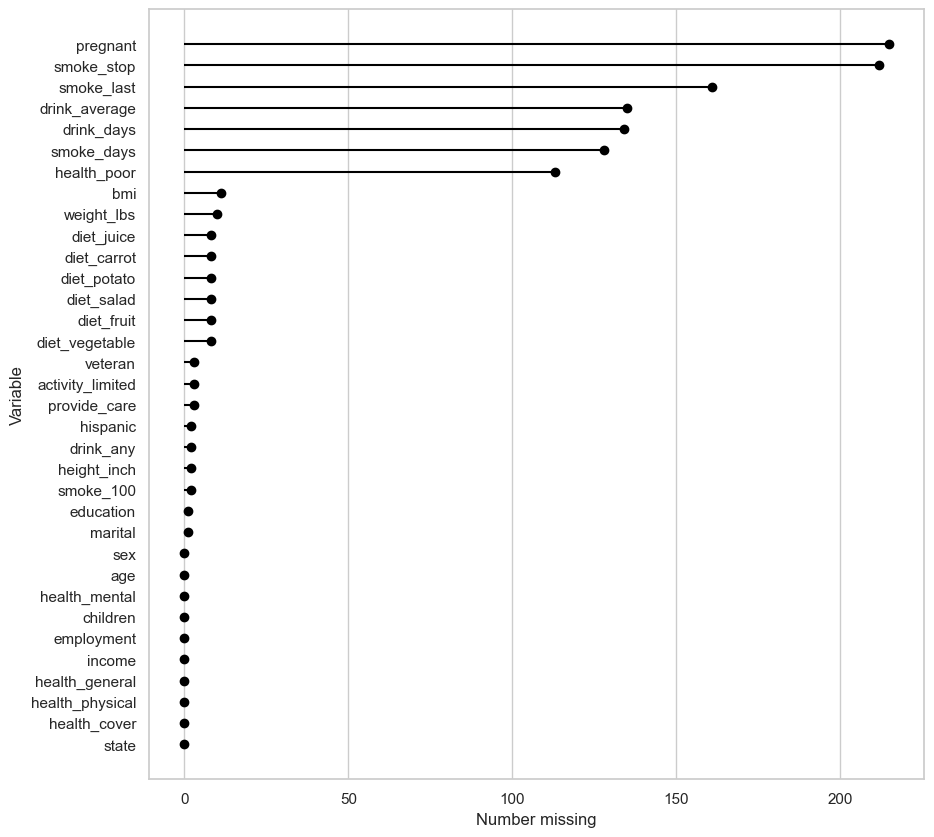

In [30]:
df_rf.missing.missing_variable_plot()

### Casos / Observaciones / Filas

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


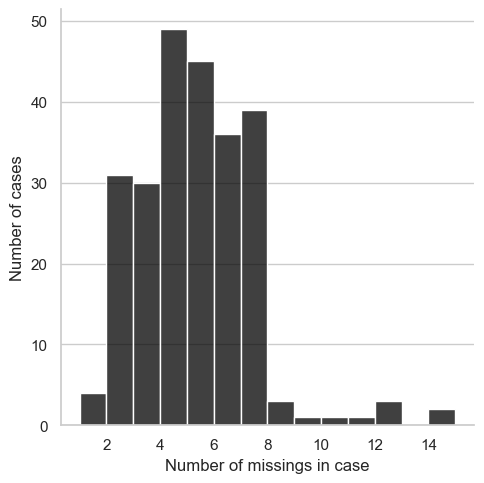

In [31]:
df_rf.missing.missing_case_plot()

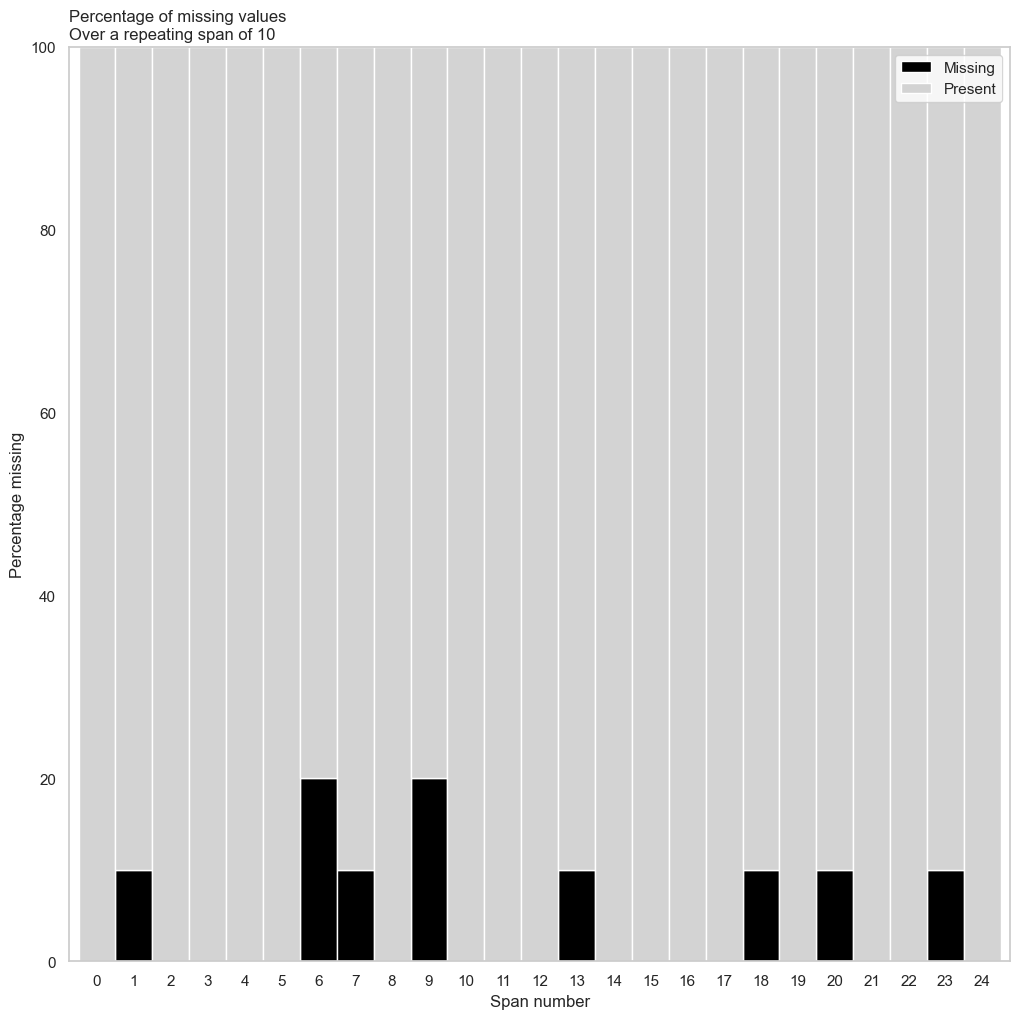

In [32]:
(
    df_rf
    .missing
    .missing_variable_span_plot(
        variable='weight_lbs',
        span_every=10,
        rot = 0
    )
)

<Axes: >

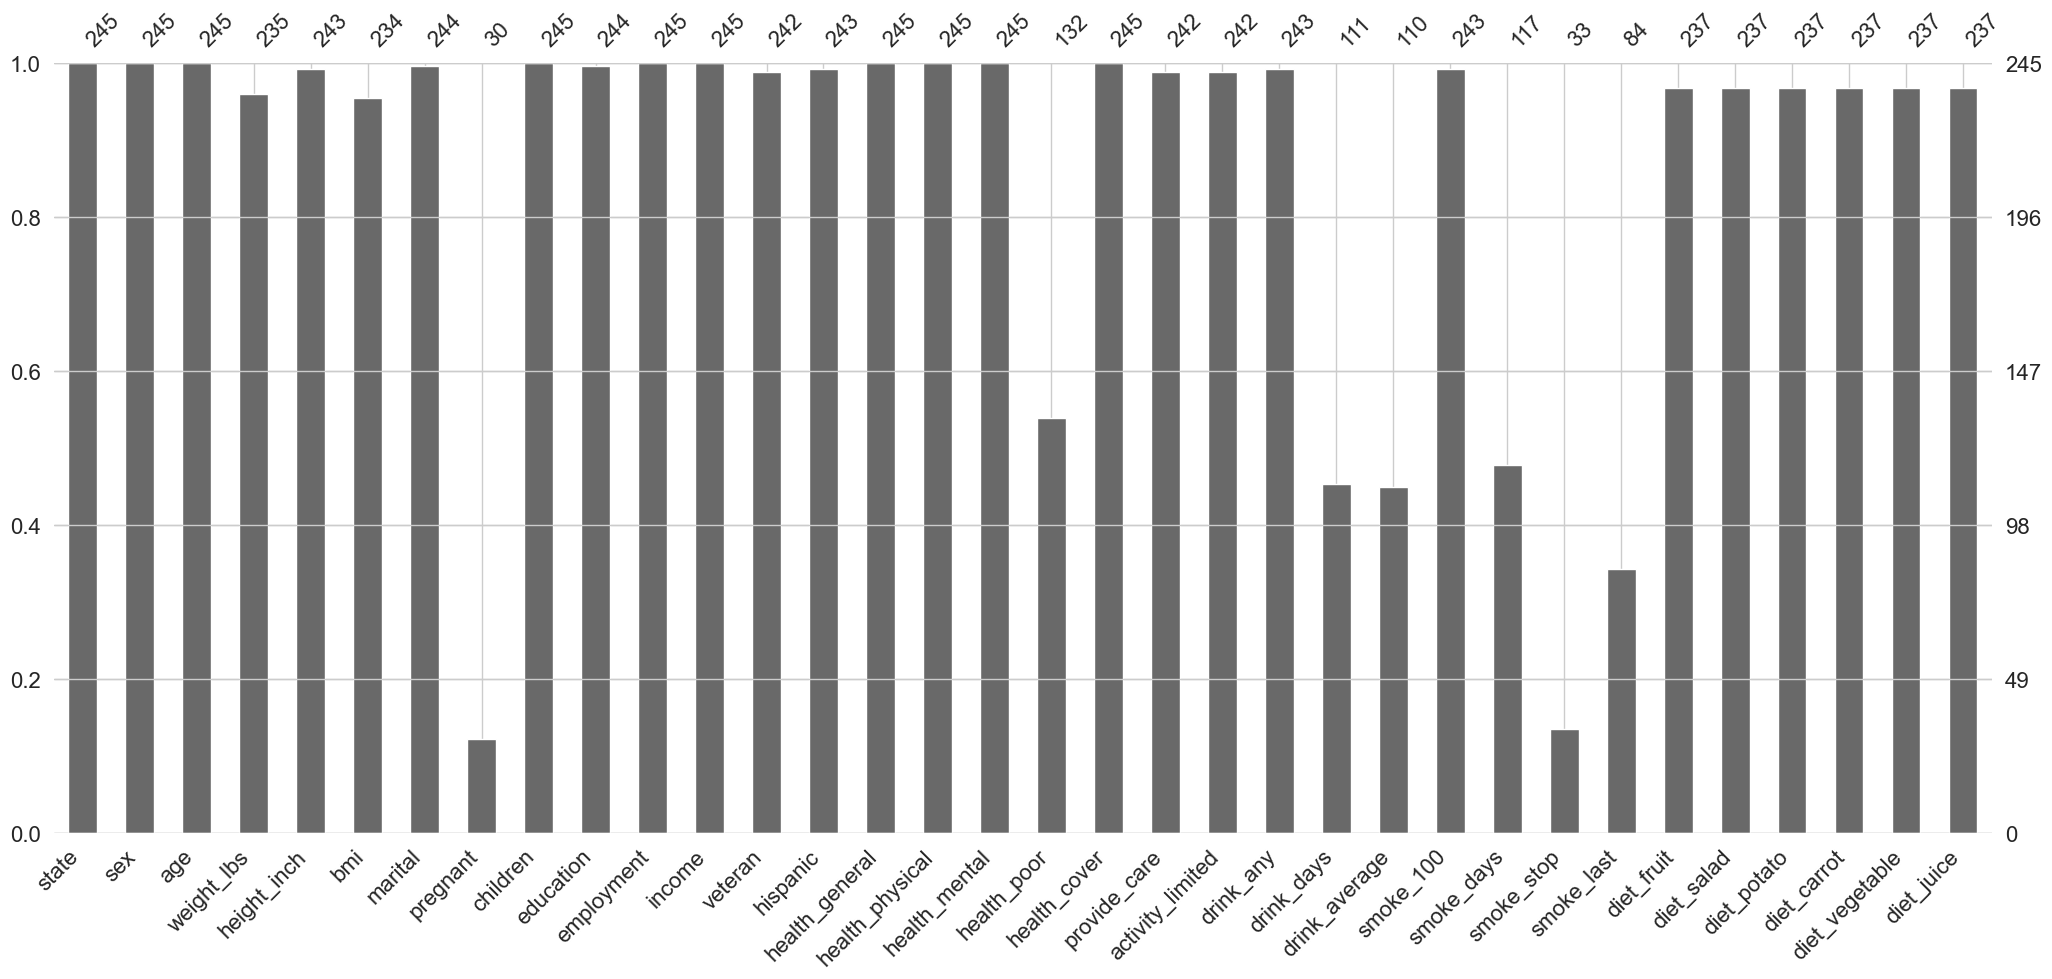

In [33]:
missingno.bar(df=df_rf)

<Axes: >

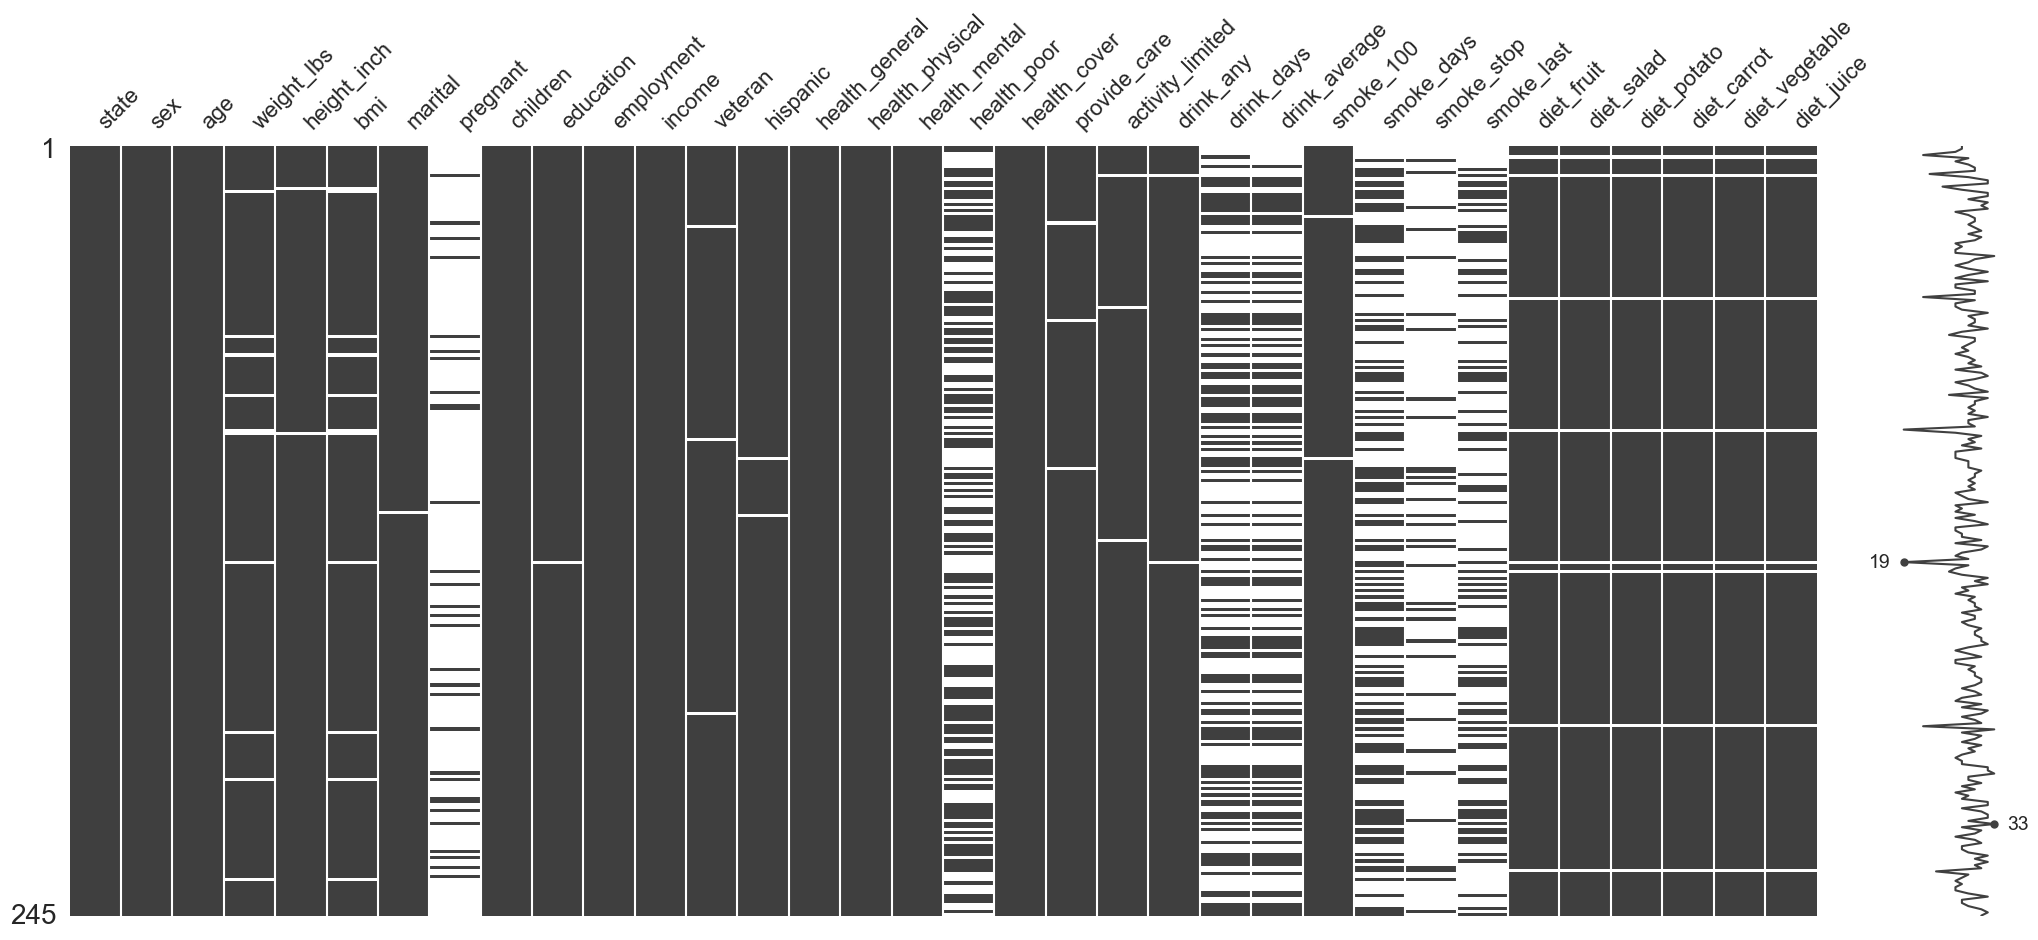

In [34]:
missingno.matrix(df=df_rf)

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\upsetplot\plotting.py:580: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)
c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\upsetplot\plotting.py:586: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

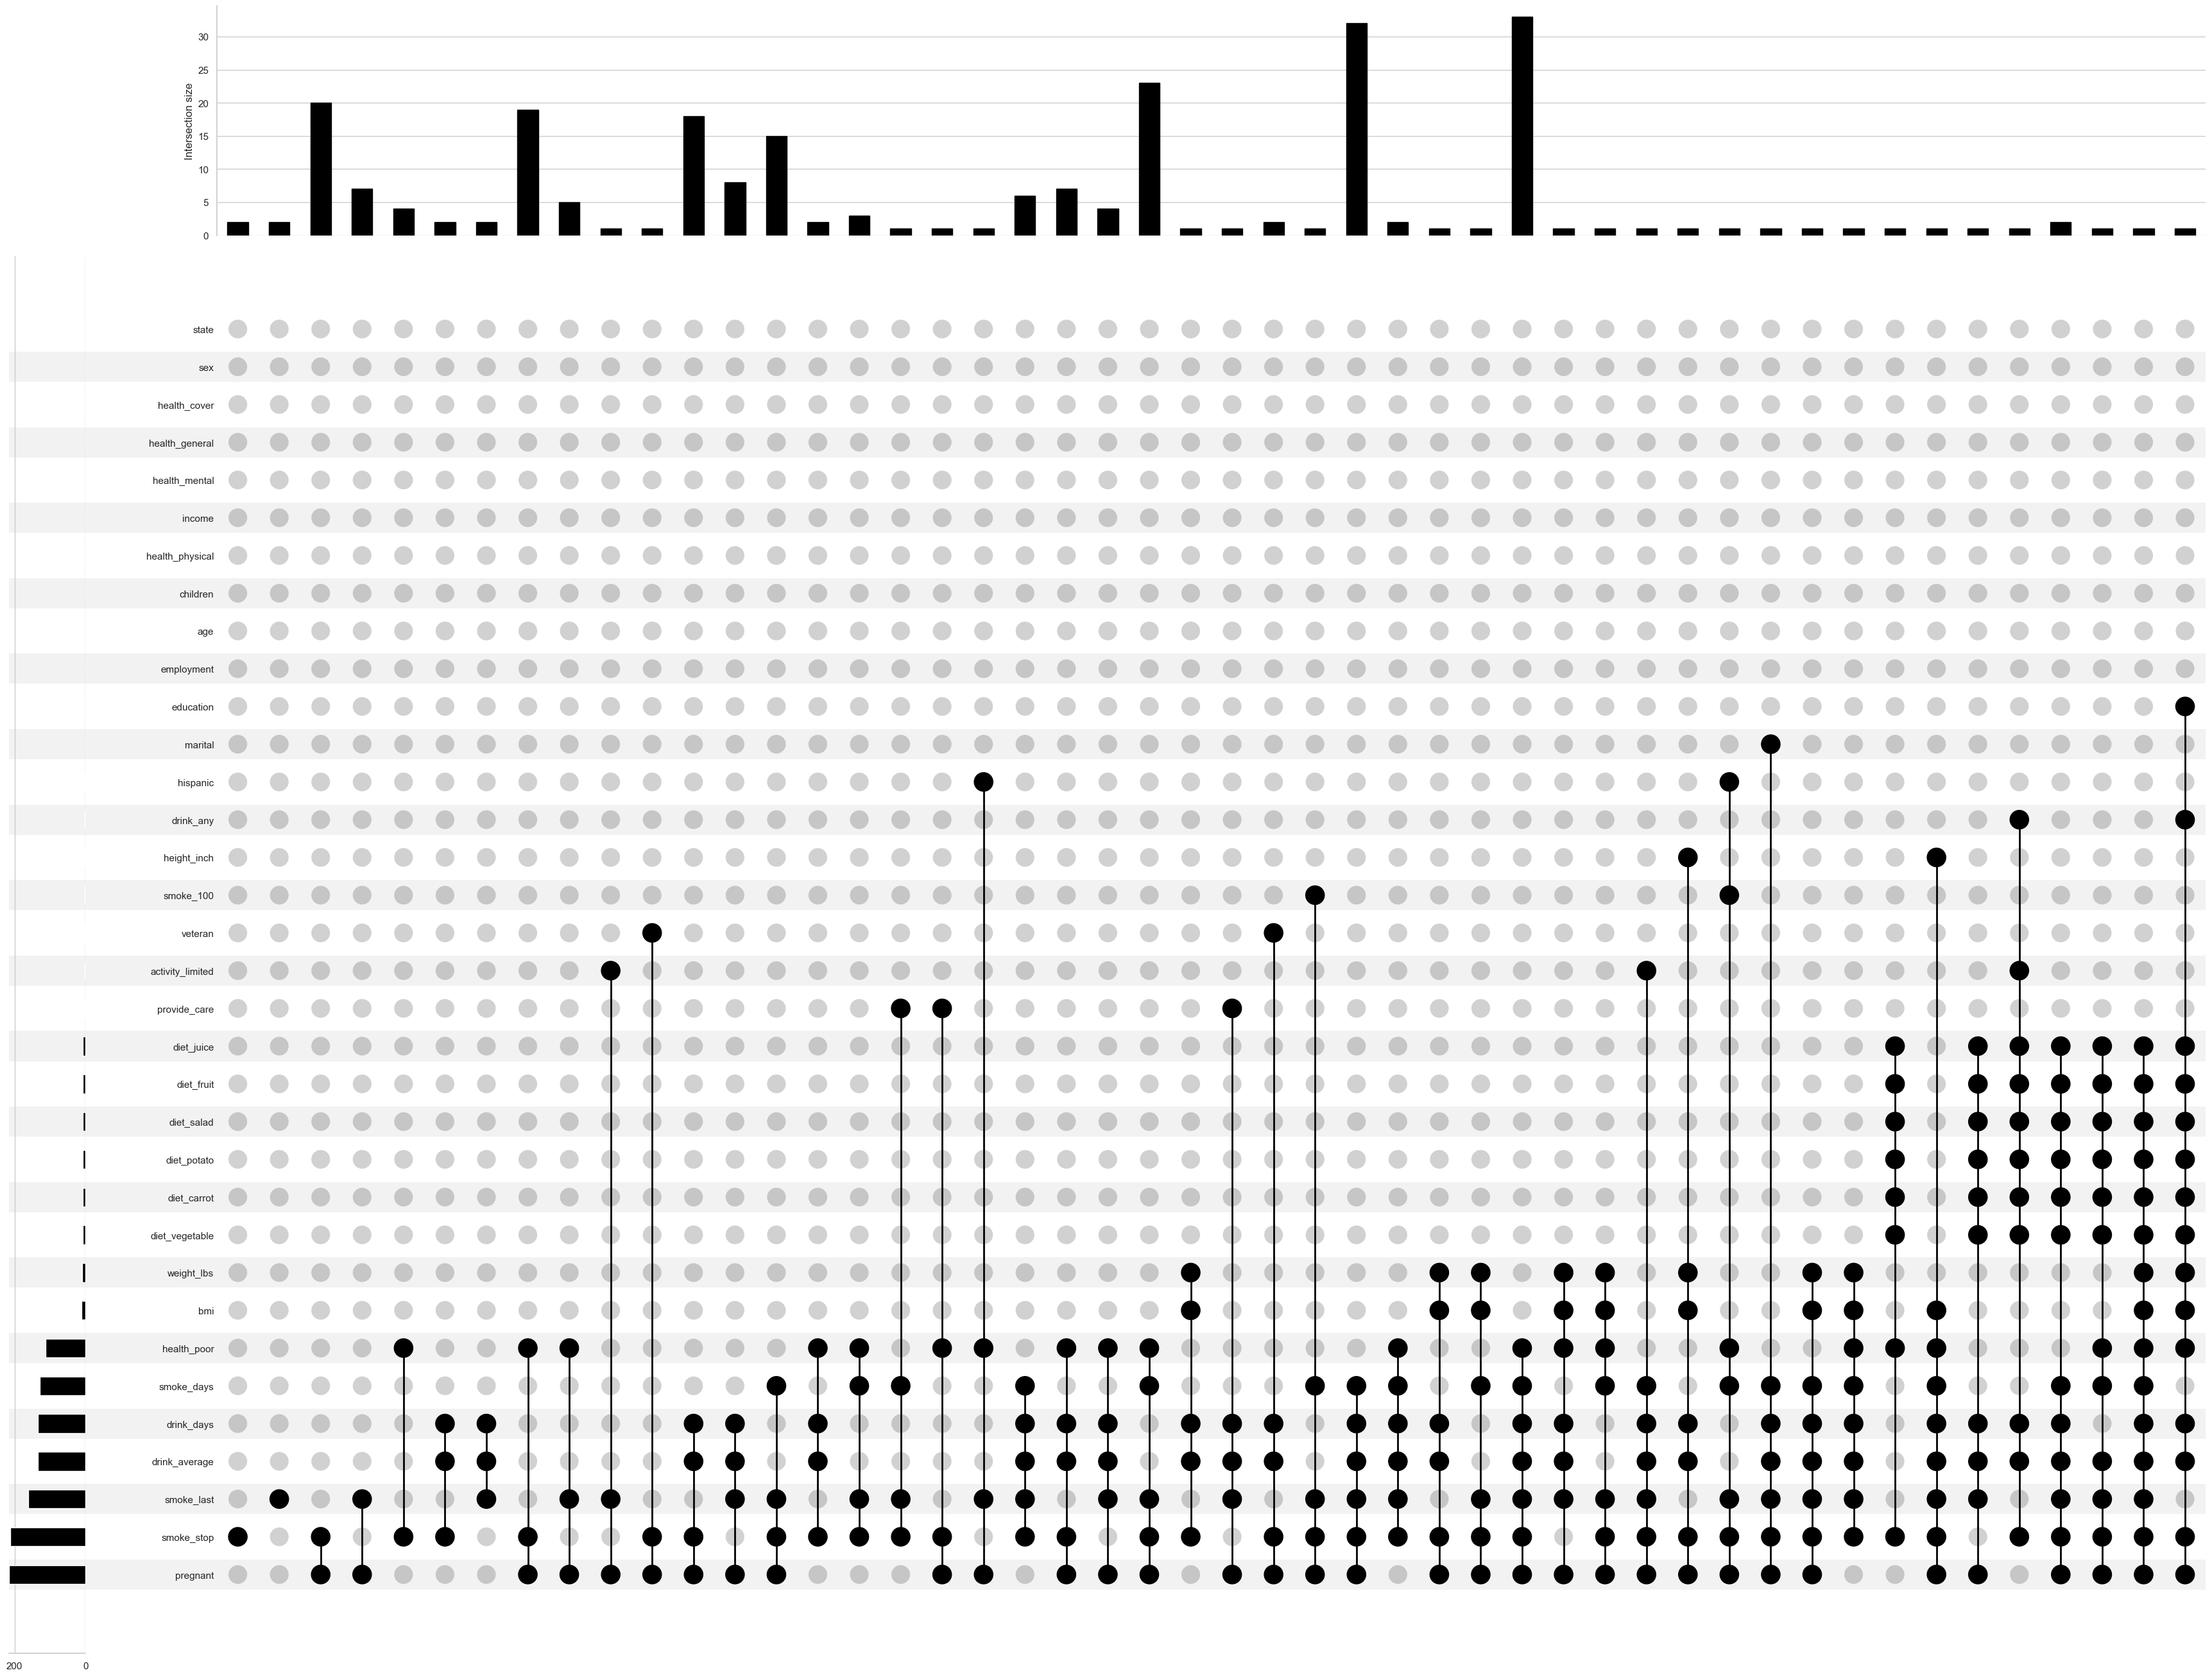

In [35]:
(
    df_rf
    .missing
    .missing_upsetplot(
        variables=None,
        element_size=60
    )
)

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\upsetplot\plotting.py:580: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)
c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\upsetplot\plotting.py:586: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

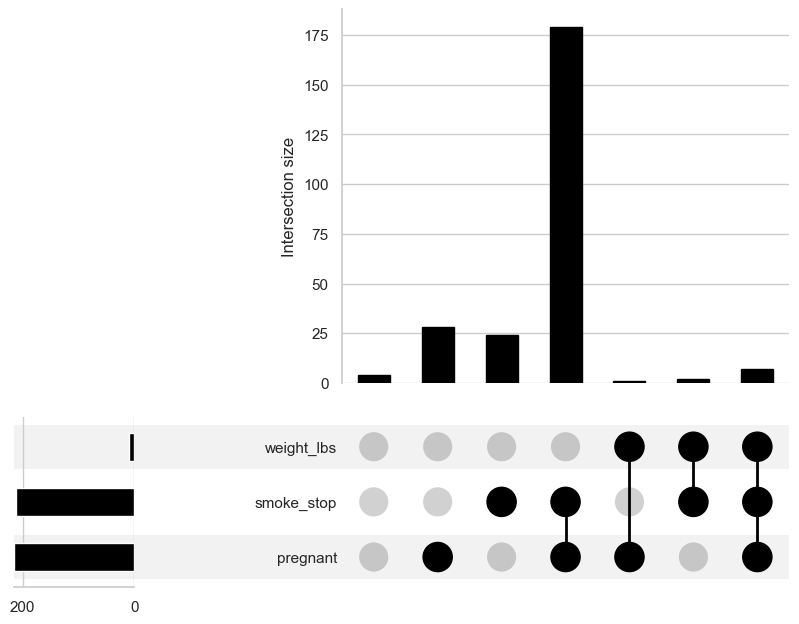

In [36]:
(
    df_rf
    .missing
    .missing_upsetplot(
        variables=['pregnant', 'weight_lbs', 'smoke_stop'],
        element_size=60
    )
)

## Codificación de valores faltantes

### Valores comúnmente asociados a valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

#### Cadenas de texto

In [37]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [38]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

#### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [39]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [40]:
missing_data_example_df.missing.number_missing()

0

#### Revisar tipos de datos

In [41]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [42]:
missing_data_example_df['x'].unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [43]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [44]:
pd.read_csv(
    '../data/missing_data_enconding_example.csv',
    na_filter=True,
    na_values=[-99,-1]
    )

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


#### Sustitución global

In [45]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99, 'NA'],
        value=np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


#### Sustitución dirigida

In [46]:
(
    missing_data_example_df
    .replace(
        to_replace={
            'x' : {
                -99 : np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [47]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


## Estrategias para la identificación de valores faltantes implícitos

### Pivotar la tabla de datos

In [48]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index='name',
        names_from='time',
        values_from='value'
    )
)

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.pivot` instead.
  return method(self._obj, *args, **kwargs)


,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


### Cuantificar ocurrencias de n-tuplas

In [49]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=['name']
    )
    .reset_index(name='n')
    .query('n<3')
)

,name,n
1,zelda,1


## Exponer filas faltantes implícitas en explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

### Exponer n-tuplas de valores faltantes

In [50]:
# Ejemplo, encontrar los pares faltantes de 'name' y 'time'ArithmeticError
(
    implicit_to_explicit_df
    # janitor
    .complete(
        'name', 
        'time'
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


### Limitar la exposición de n-tuplas de valores faltantes

In [51]:
(
    implicit_to_explicit_df
    .complete(
        {'name': ['lynn','zelda']},
        {'time': ['morning','afternoon']},
        sort=True
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


### Rellenar los valores faltantes

In [52]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value=np.nan
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


### Limitar el rellenado de valores faltantes implícitos

In [53]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value=0,
        explicit=False
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


## Tipos de valores faltantes: MCAR, MAR, MNAR en Python

In [54]:
df_db =pd.read_csv('../data/diabetes_csv.csv')
df_db.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


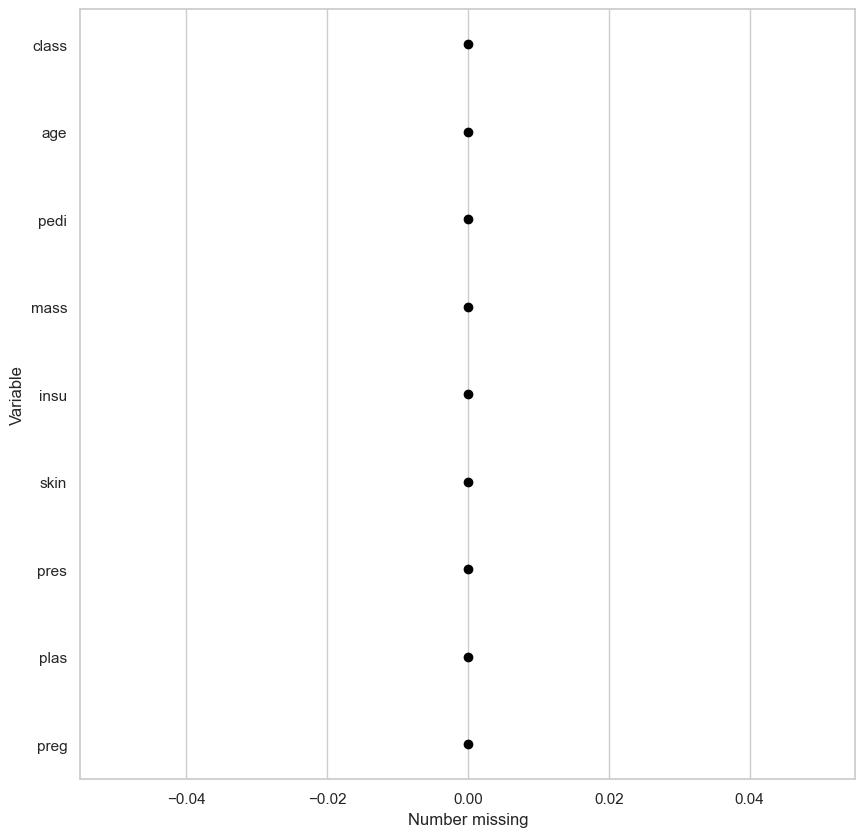

In [55]:
df_db.missing.missing_variable_plot()

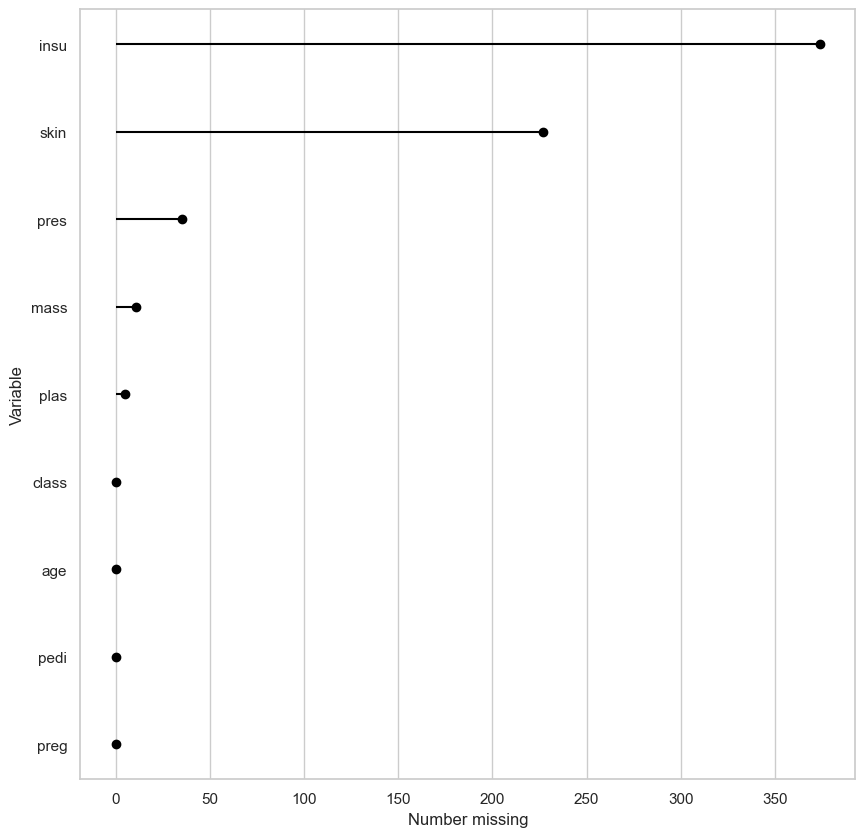

In [56]:
df_db[df_db.columns[1:6]] = df_db[df_db.columns[1:6]].replace(0,np.nan)
df_db.missing.missing_variable_plot()

### MCAR: _Missing completely at random_

In [57]:
(
    df_db
    .missing.sort_variables_by_missingness()
)

,insu,skin,pres,mass,plas,preg,pedi,age,class
0,NaN,35.0,72.0,33.6,148.0,6,0.627,50,tested_positive
1,NaN,29.0,66.0,26.6,85.0,1,0.351,31,tested_negative
2,NaN,NaN,64.0,23.3,183.0,8,0.672,32,tested_positive
3,94.0,23.0,66.0,28.1,89.0,1,0.167,21,tested_negative
4,168.0,35.0,40.0,43.1,137.0,0,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,180.0,48.0,76.0,32.9,101.0,10,0.171,63,tested_negative
764,NaN,27.0,70.0,36.8,122.0,2,0.340,27,tested_negative
765,112.0,23.0,72.0,26.2,121.0,5,0.245,30,tested_negative
766,NaN,NaN,60.0,30.1,126.0,1,0.349,47,tested_positive


<Axes: >

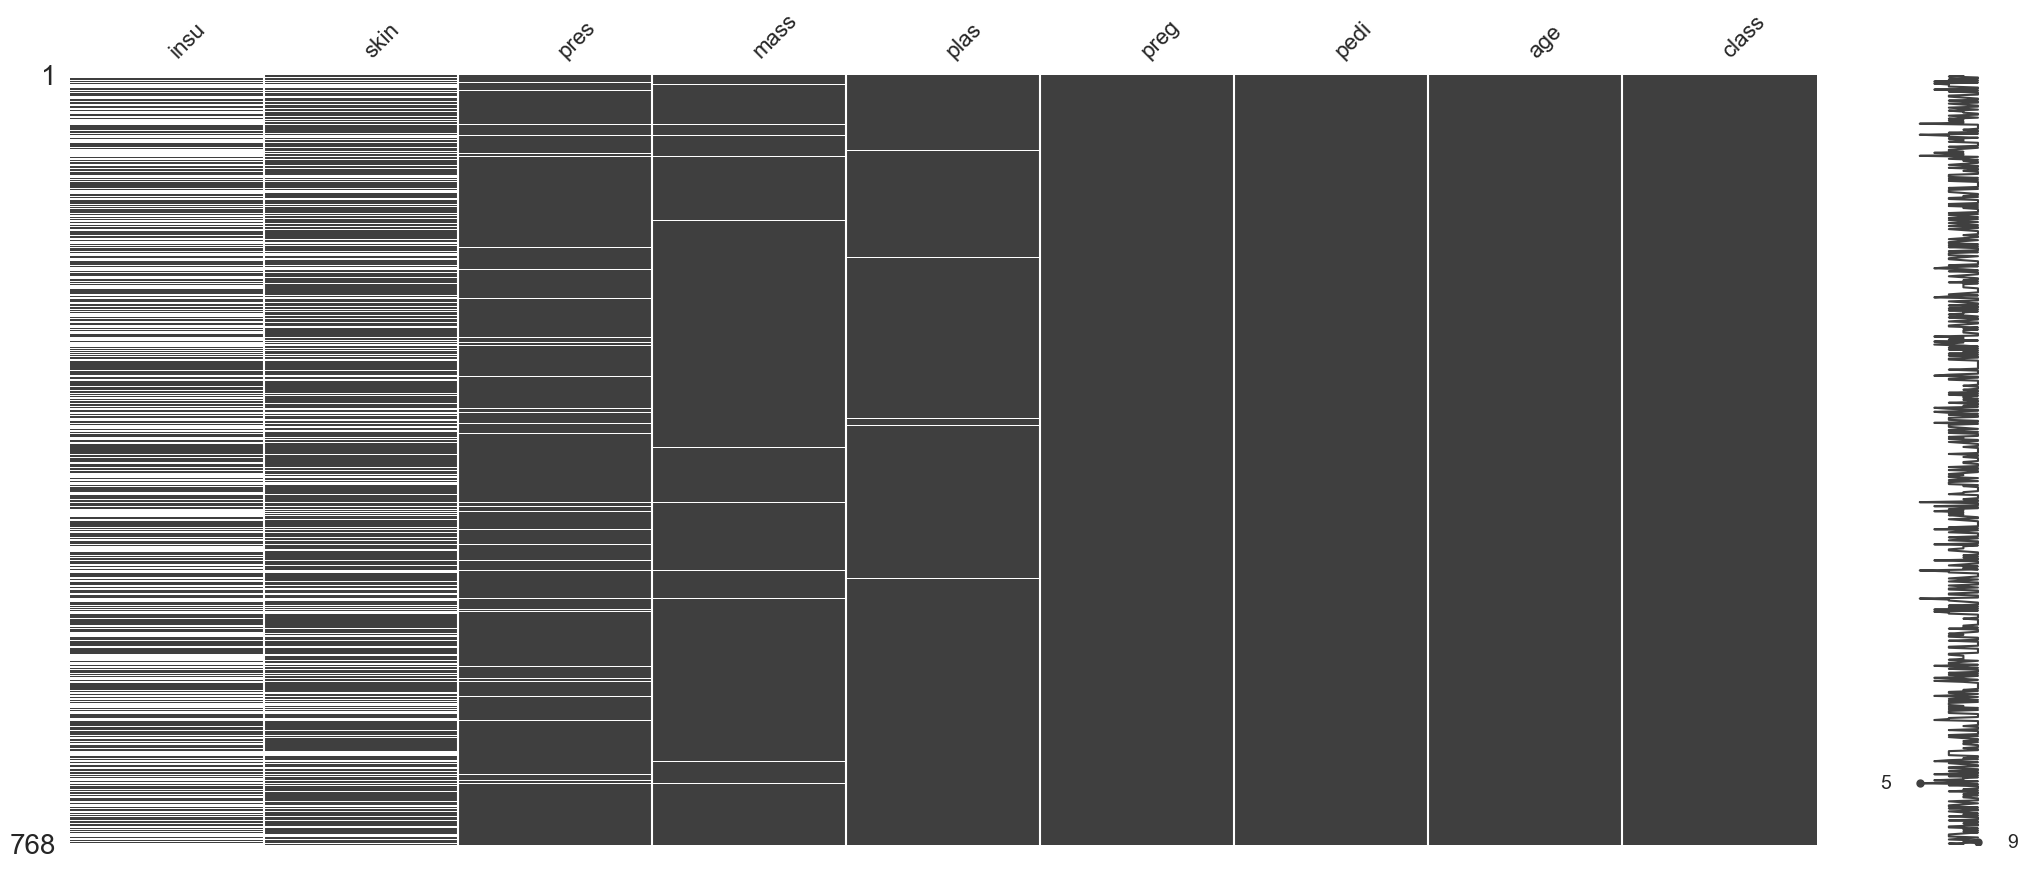

In [58]:
(
    df_db
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

### MAR: _Missing at random_

<Axes: >

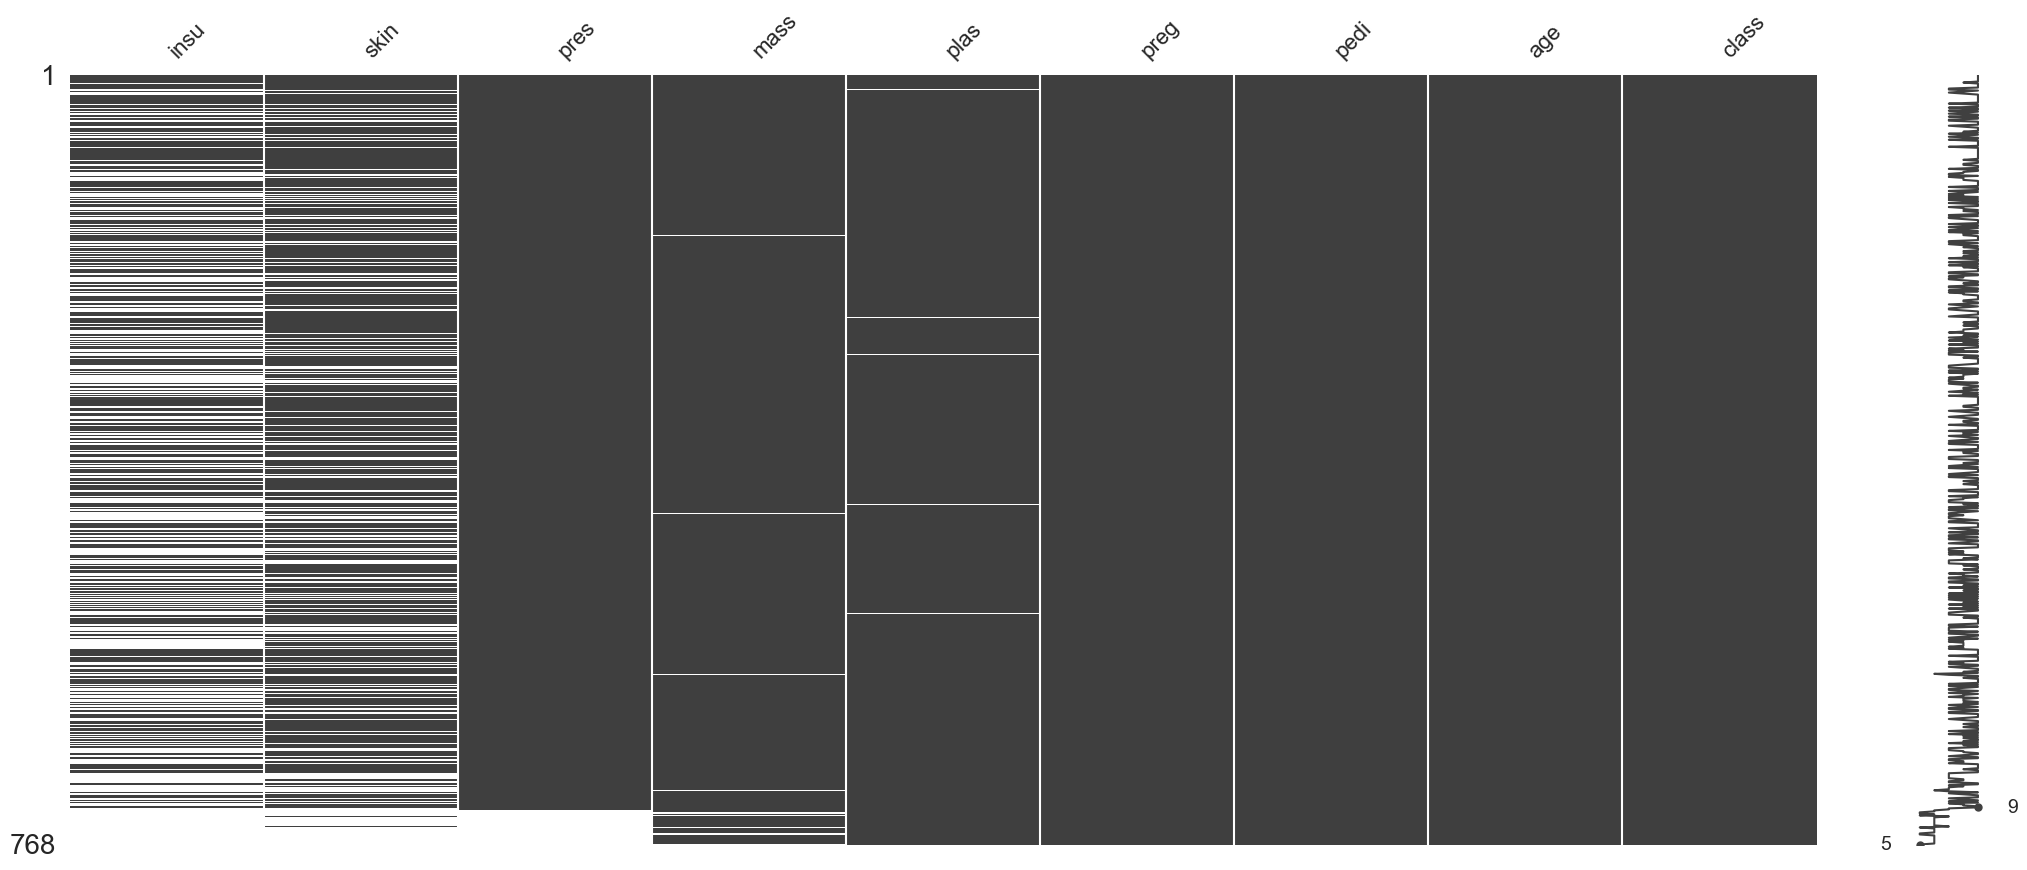

In [59]:
(
    df_db
    .missing.sort_variables_by_missingness()
    .sort_values(by='pres')
    .pipe(missingno.matrix)
)

### MNAR: _Missing not at random

<Axes: >

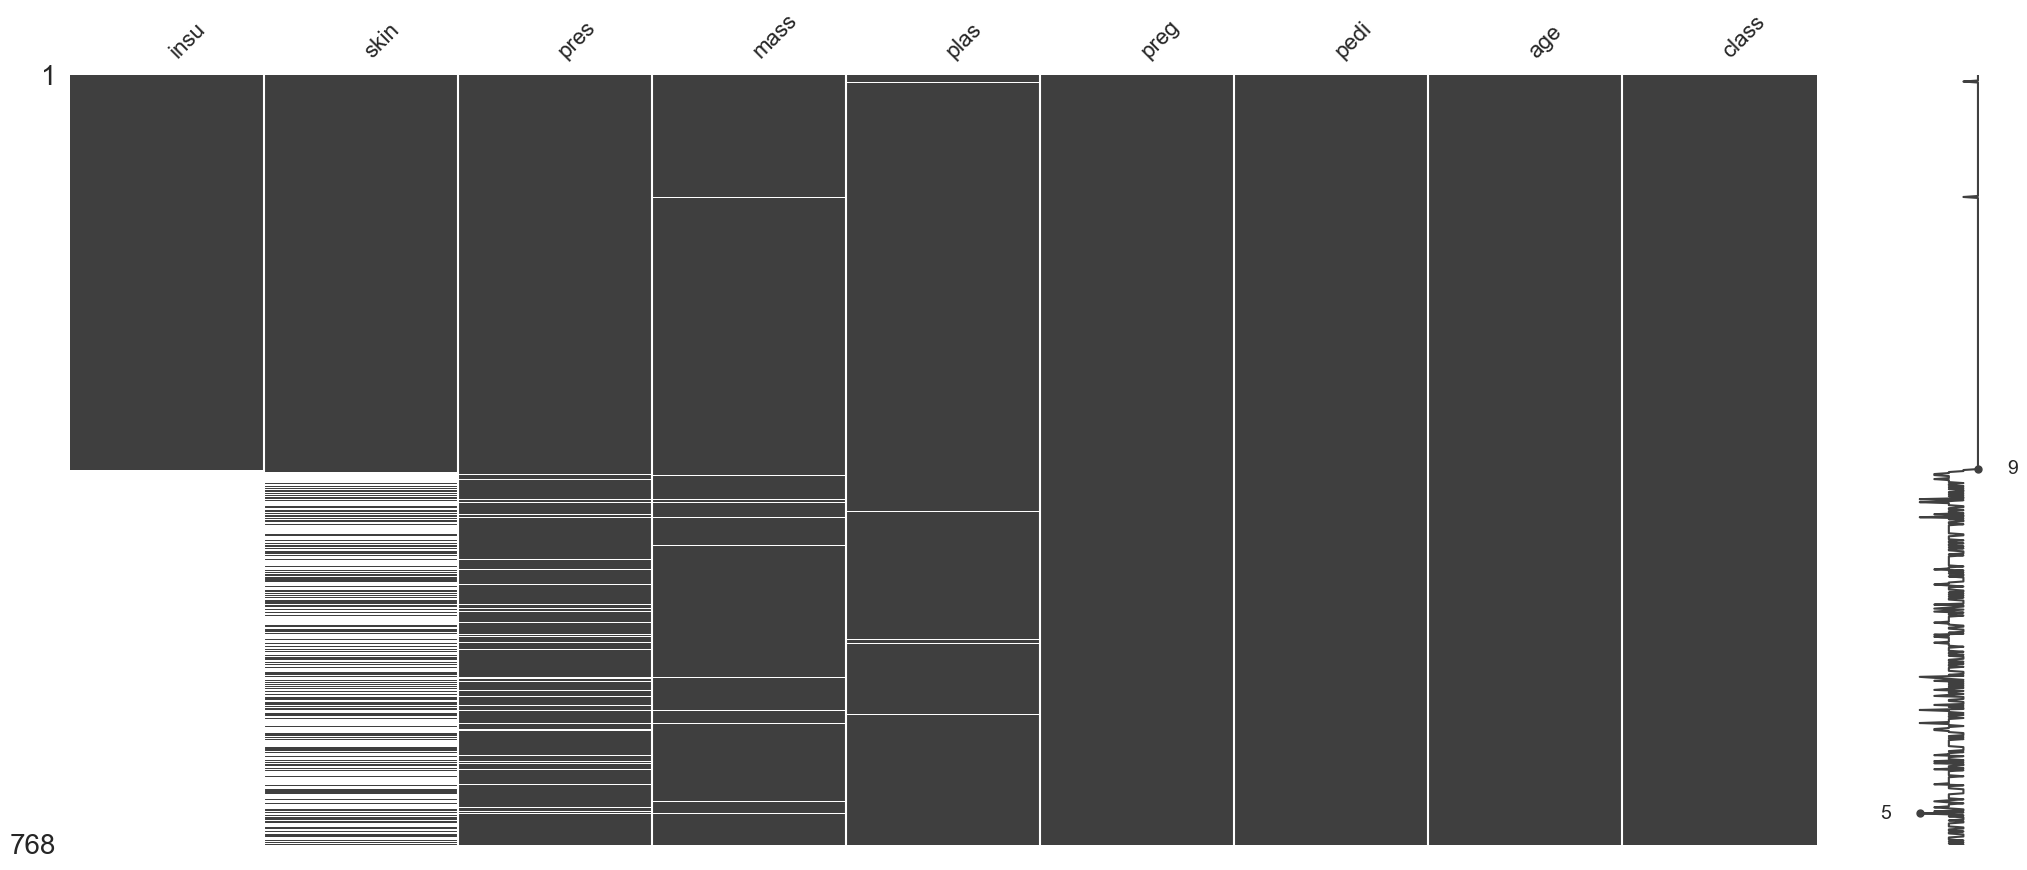

In [60]:
(
    df_db
    .missing.sort_variables_by_missingness()
    .sort_values(by='insu')
    .pipe(missingno.matrix)
)

## Matriz de sombras: The shadow matrix

### Construcción de la matriz de sombras

In [61]:
(
    df_rf
    .isna()
    .replace({
        False:'Not missing',
        True:'Missing'
    })
    .add_suffix('_NA')
    .pipe(
        lambda shadow_matrix : pd.concat(
            [df_rf, shadow_matrix],
            axis='columns'
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


### Utilizar función de utilería `bind_shadow_matrix()`

In [62]:
(
    df_rf
    .missing
    .bind_shadow_matrix()
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [63]:
(
    df_rf
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [64]:
(
    df_rf
    .missing
    .bind_shadow_matrix(only_missing=True)
    .groupby(['weight_lbs_NA'])
    ['age']
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


## Visualización de valores faltantes en una variable

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

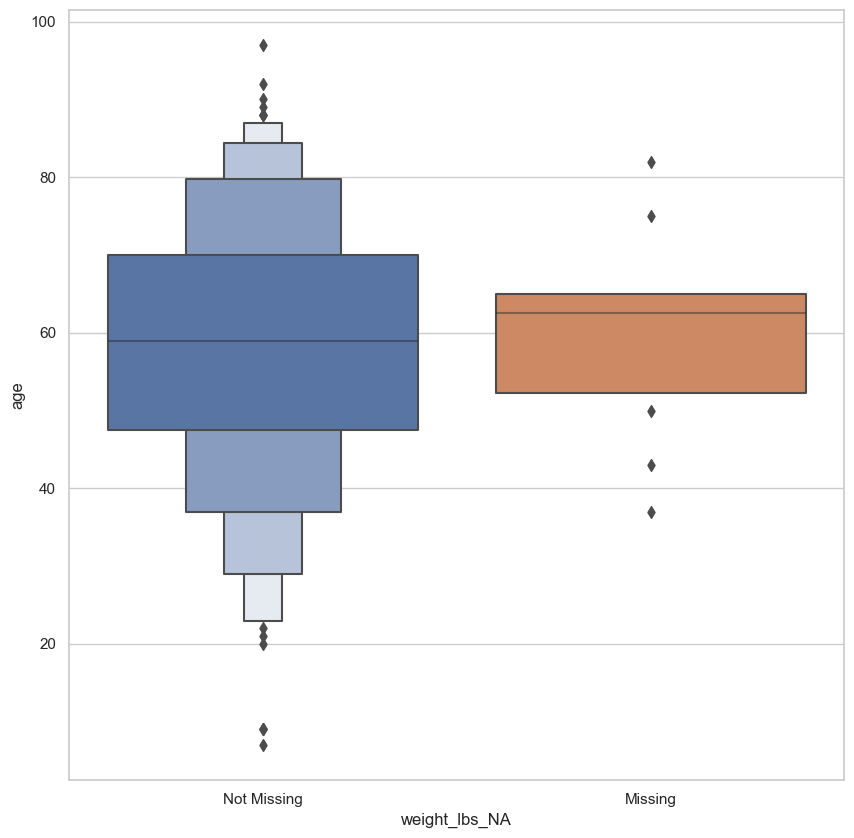

In [65]:
(
    df_rf
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.boxenplot(
                data = df,
                x='weight_lbs_NA',
                y='age'
            )
        )
    )
)

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


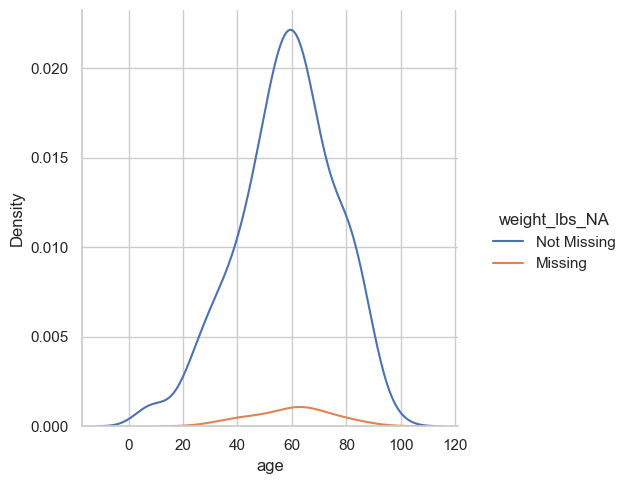

In [66]:
(
    df_rf
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.displot(
                data = df,
                x='age',
                hue='weight_lbs_NA',
                kind='kde'
            )
        )
    )
)

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


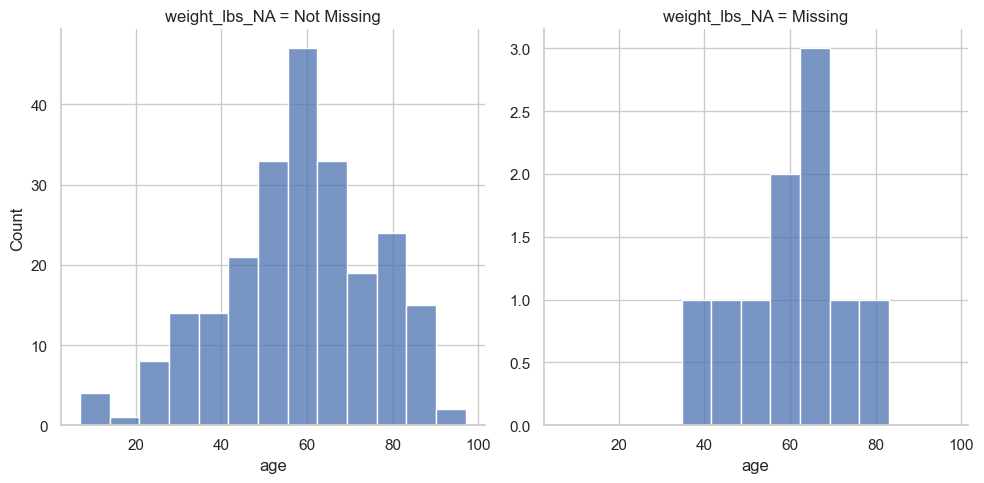

In [67]:
(
    df_rf
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.displot(
                data = df,
                x='age',
                col='weight_lbs_NA',
                facet_kws={
                    'sharey' : False
                }
            )
        )
    )
)

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


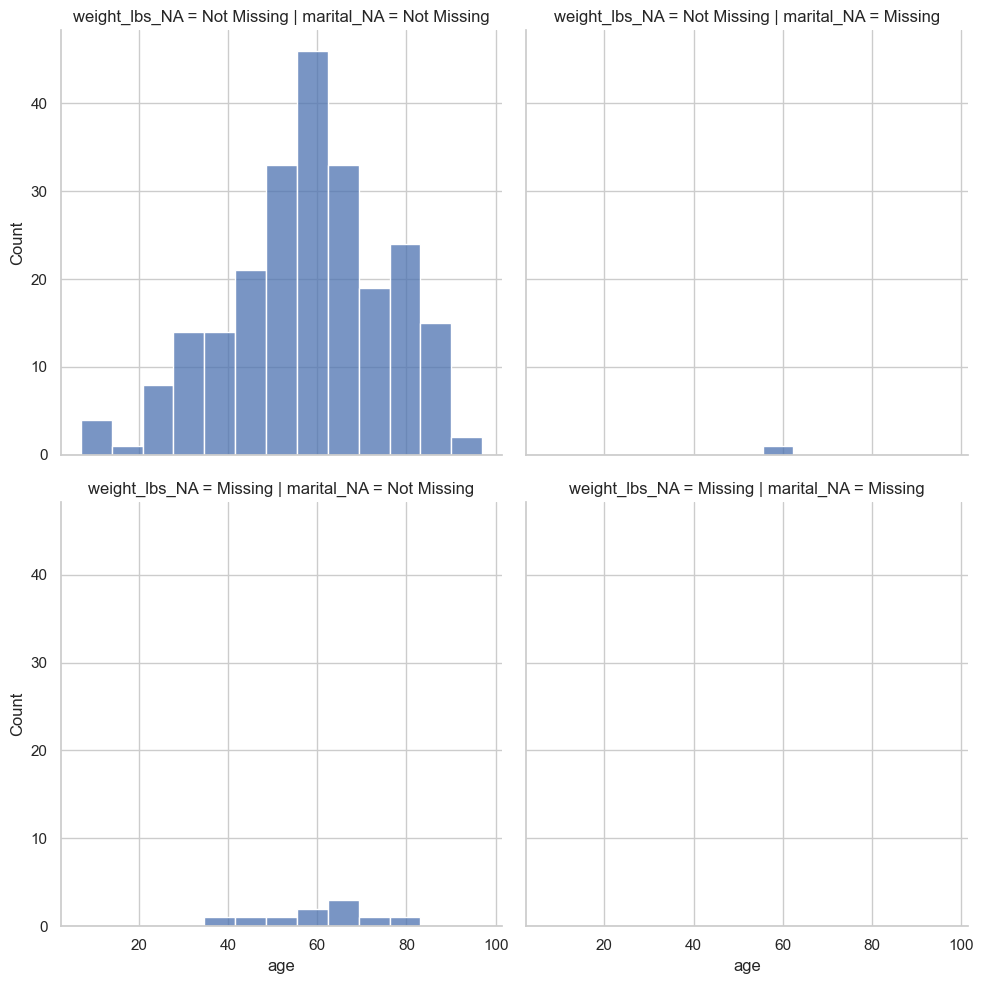

In [68]:
(
    df_rf
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.displot(
                data = df,
                x='age',
                col='marital_NA',
                row='weight_lbs_NA'
            )
        )
    )
)

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


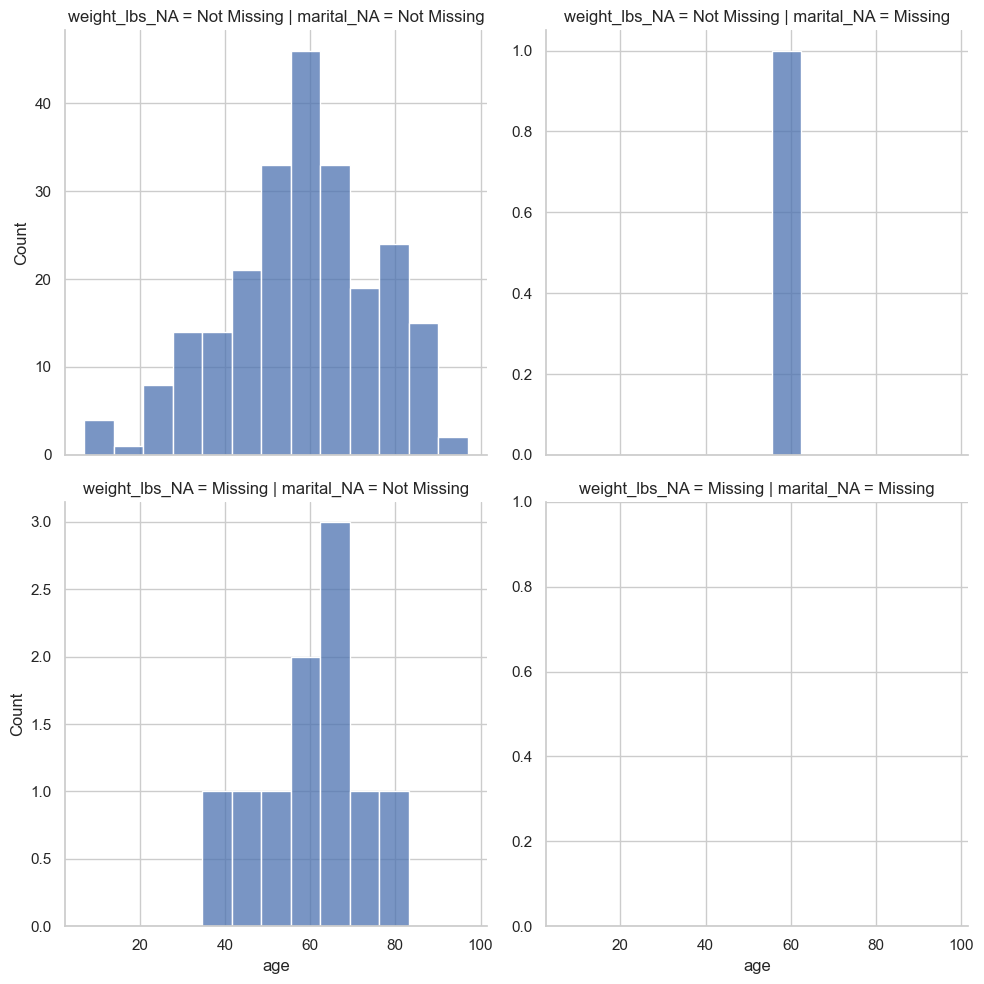

In [69]:
(
    df_rf
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.displot(
                data = df,
                x='age',
                col='marital_NA',
                row='weight_lbs_NA',
                facet_kws={
                    'sharey' : False
                }
            )
        )
    )
)

## Visualización de valores faltantes en dos variables
Cómo explorar el concepto con múltiples variables

In [70]:
def column_fill_with_dummies(
        column : pd.Series,
        proportion_below: float=0.10,
        jitter: float=0.075,
        seed: int=42
) -> pd.Series:
    column = column.copy(deep=True)
    # Extraer values metadats
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_rage = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min()*proportion_below

    # Create the 'jitter' (noise) to be added around the points
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values)-2)*column_rage*jitter
    
    #Save new dummy data
    column[missing_mask] = column_shift + column_jitter

    return column


### Scatterplot con valores faltantes
Con dos variables con datos faltantes

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

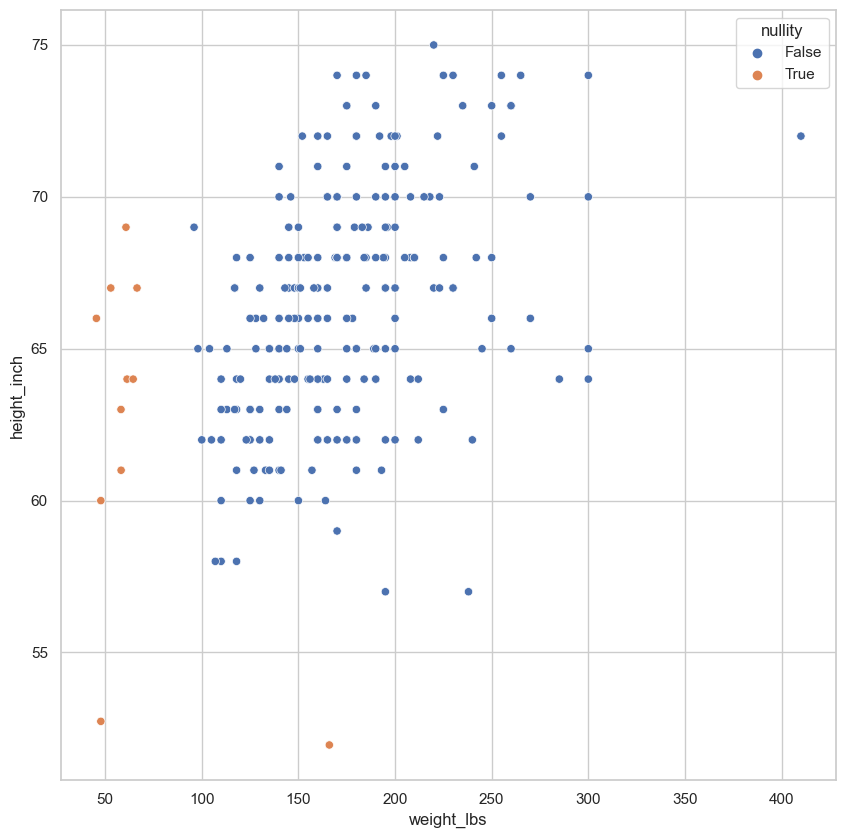

In [71]:
(
    df_rf
    .select_dtypes(
        exclude='object'
    )
    .pipe(
        lambda df : df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        lambda column : column if '_NA' in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity= lambda df: df['weight_lbs_NA'] | df['height_inch_NA']
    )
    .pipe (
        lambda df: 
        sns.scatterplot(
            data=df,
            x='weight_lbs',
            y='height_inch',
            hue='nullity'
        )
    )
)

## Correlación de nulidad

<Axes: >

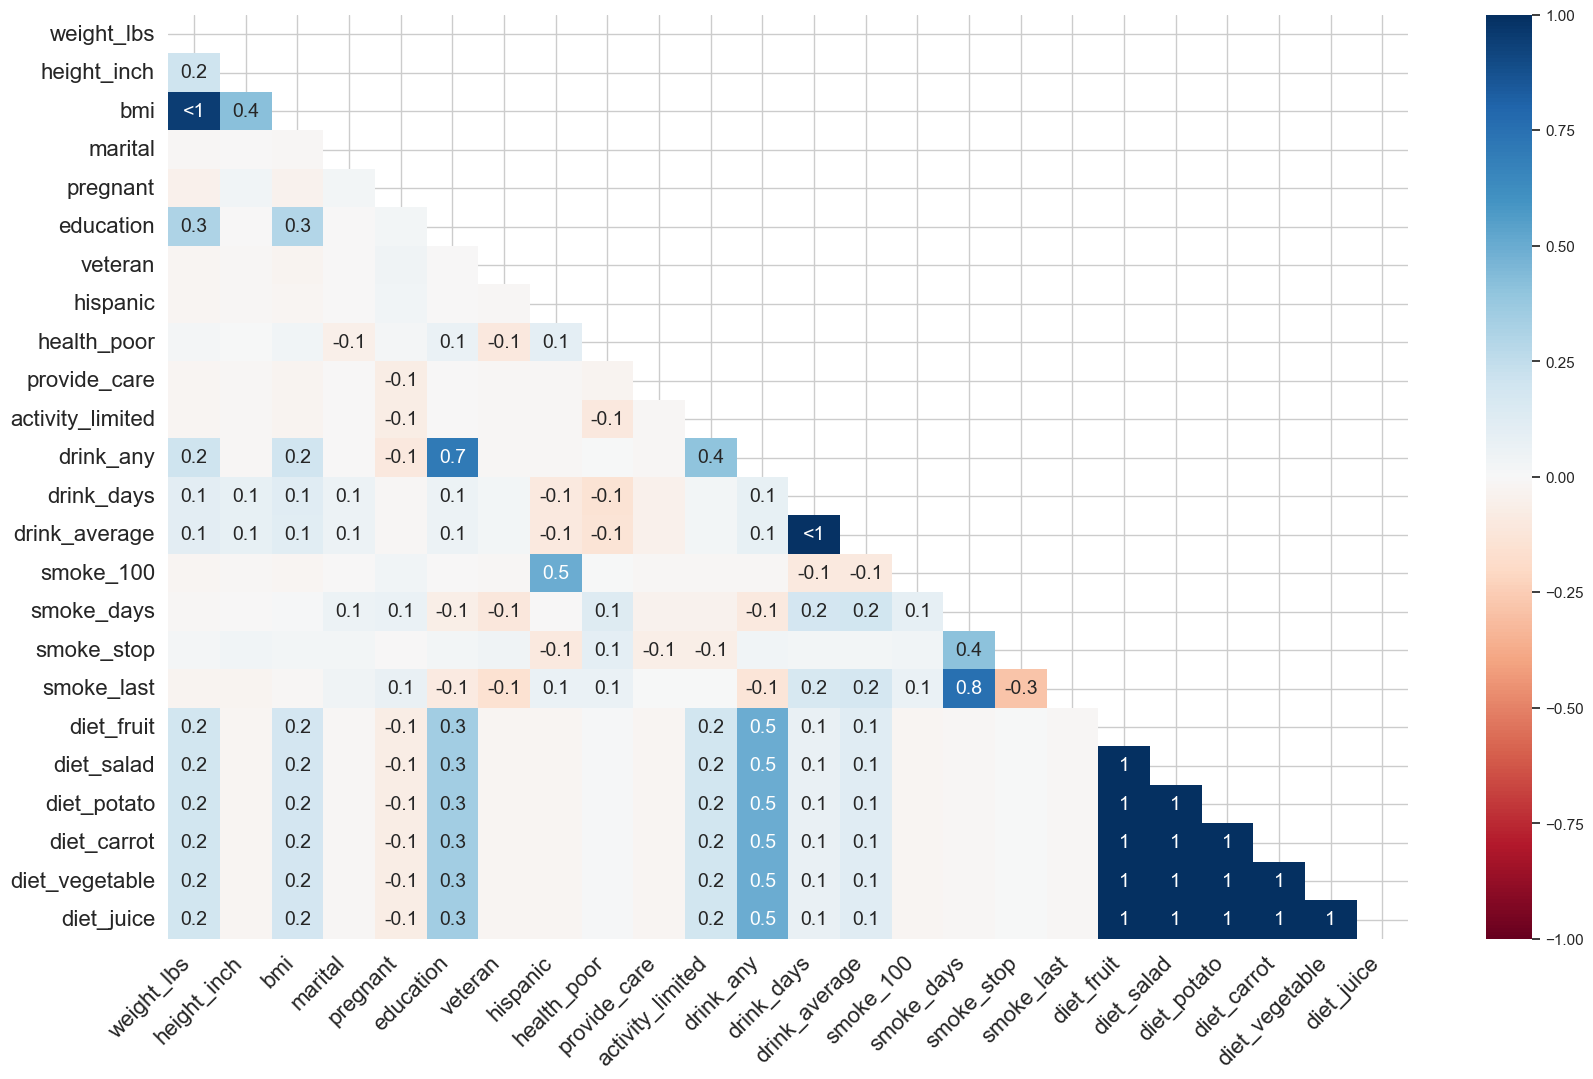

In [72]:
missingno.heatmap(
    df=df_rf
)

<Axes: >

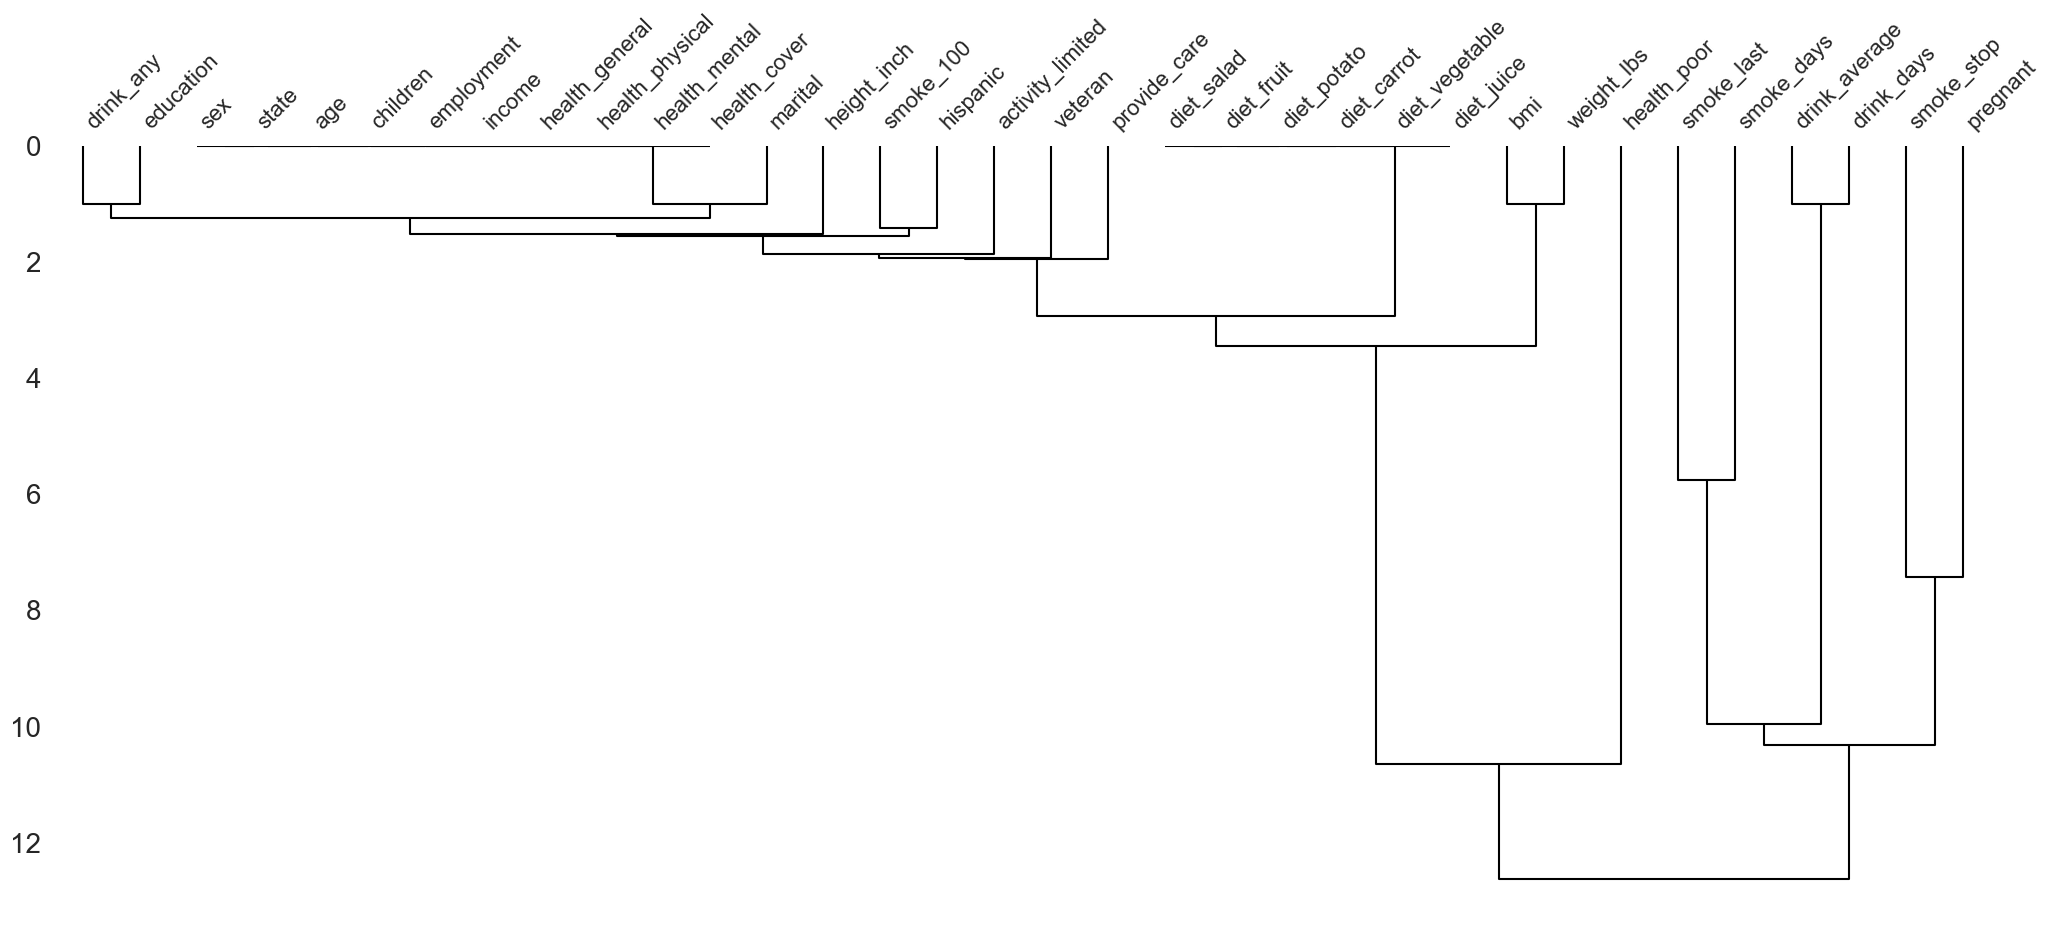

In [73]:
missingno.dendrogram(
    df=df_rf
)

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (MCAR). En cualquier otro caso, realizar una 
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los 
    análisis y modelos subsecuentes.
    </p>
</div>

Primero, revisa el número total de observaciones y variables que tiene tu conjunto de datos

In [74]:
df_rf.shape

(245, 34)

### _Pairwise deletion_ (elimicación por pares)

In [75]:
(
    df_rf['weight_lbs']
    .isna()
    .sum()
)

10

In [76]:
(
    df_rf['weight_lbs']
    .mean()
)

174.26808510638298

In [77]:
df_rf['weight_lbs'].size, df_rf['weight_lbs'].count()

(245, 235)

In [78]:
df_rf['weight_lbs'].mean(skipna=False)

nan

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

In [79]:
(
    df_rf
    .dropna(
        subset=['weight_lbs'],
        how='any'
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Yes,Not@All,NaN,7.0,365.0,156.0,104.0,52.0,730.0,365.0
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


In [80]:
(
    df_rf
    .dropna(
        subset=['weight_lbs'],
        how='any'
    )
    .shape
)

(235, 34)

#### Con base en 2 o más columnas

In [81]:
(
    df_rf
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='any'
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Yes,Not@All,NaN,7.0,365.0,156.0,104.0,52.0,730.0,365.0
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


In [82]:
(
    df_rf
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='any'
    )
    .shape
)

(234, 34)

In [83]:
(
    df_rf
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='all'
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Yes,Not@All,NaN,7.0,365.0,156.0,104.0,52.0,730.0,365.0
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


In [84]:
(
    df_rf
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='all'
    )
    .shape
)

(244, 34)

### Representación gráfica tras la eliminación de los valores faltantes

<Axes: >

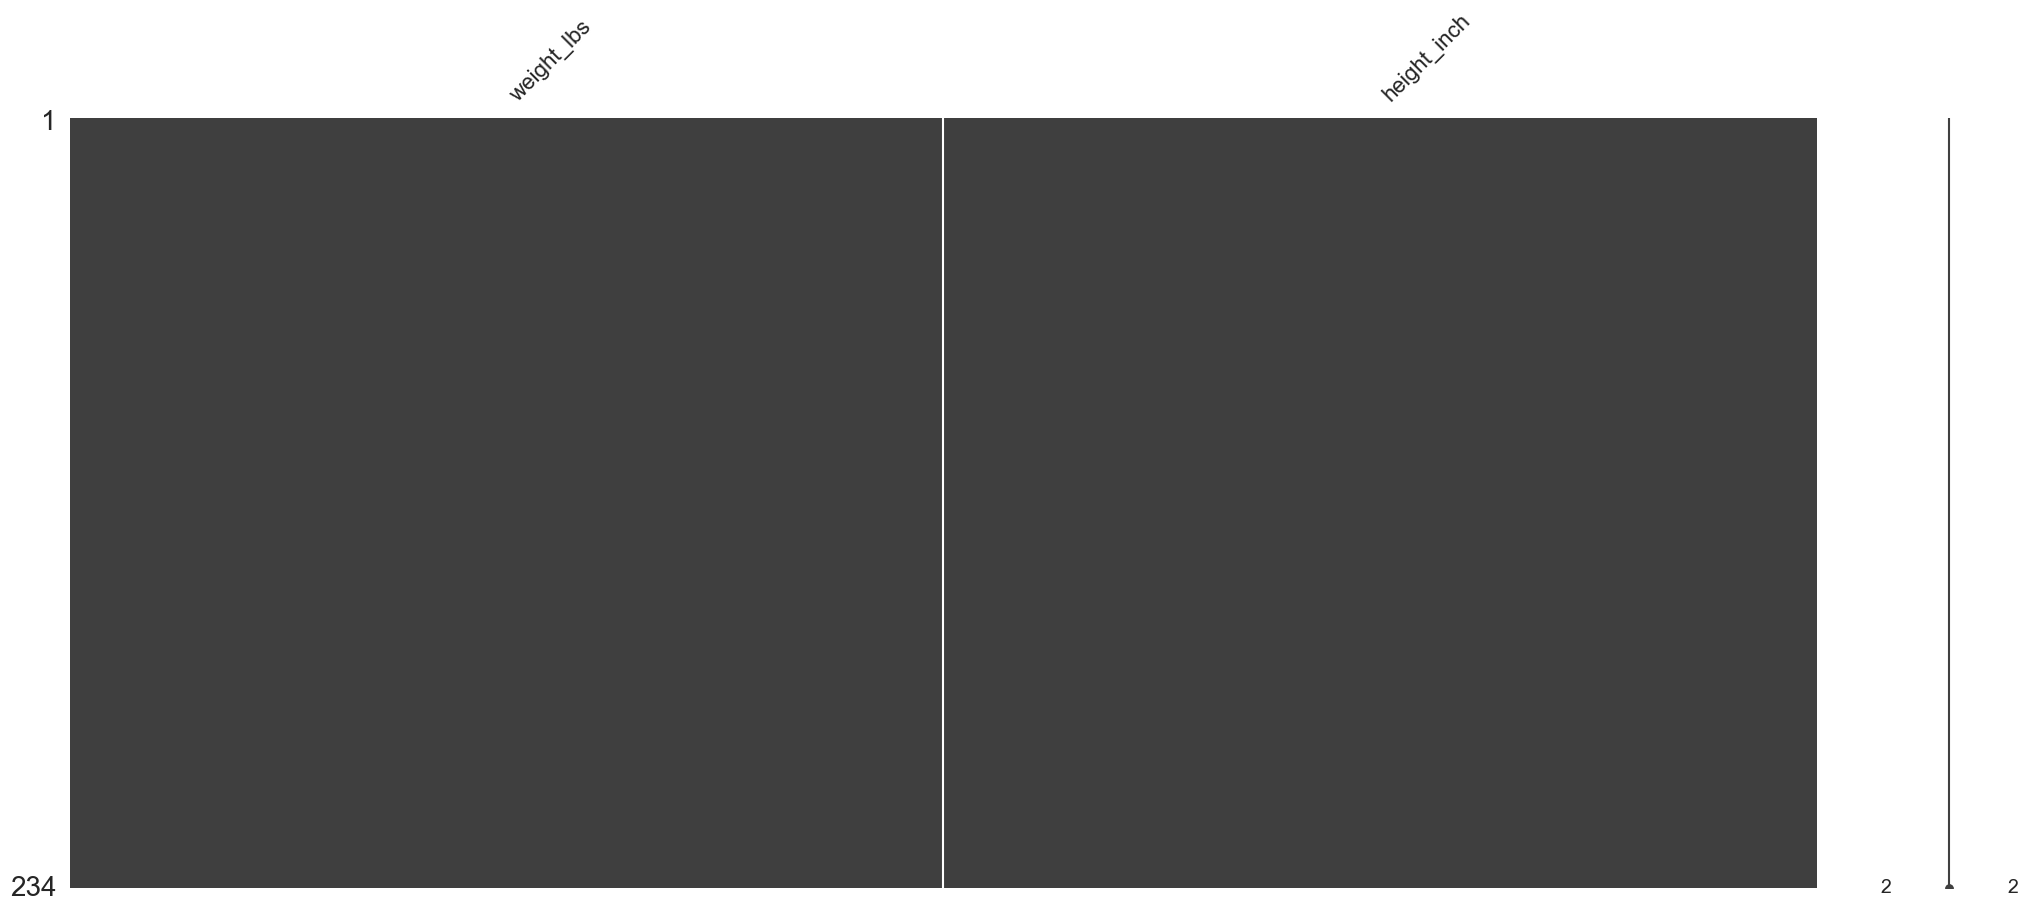

In [85]:
(
    df_rf
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='any'
    )
    .select_columns(['weight_lbs', 'height_inch'])
    .pipe(missingno.matrix)
)

<Axes: >

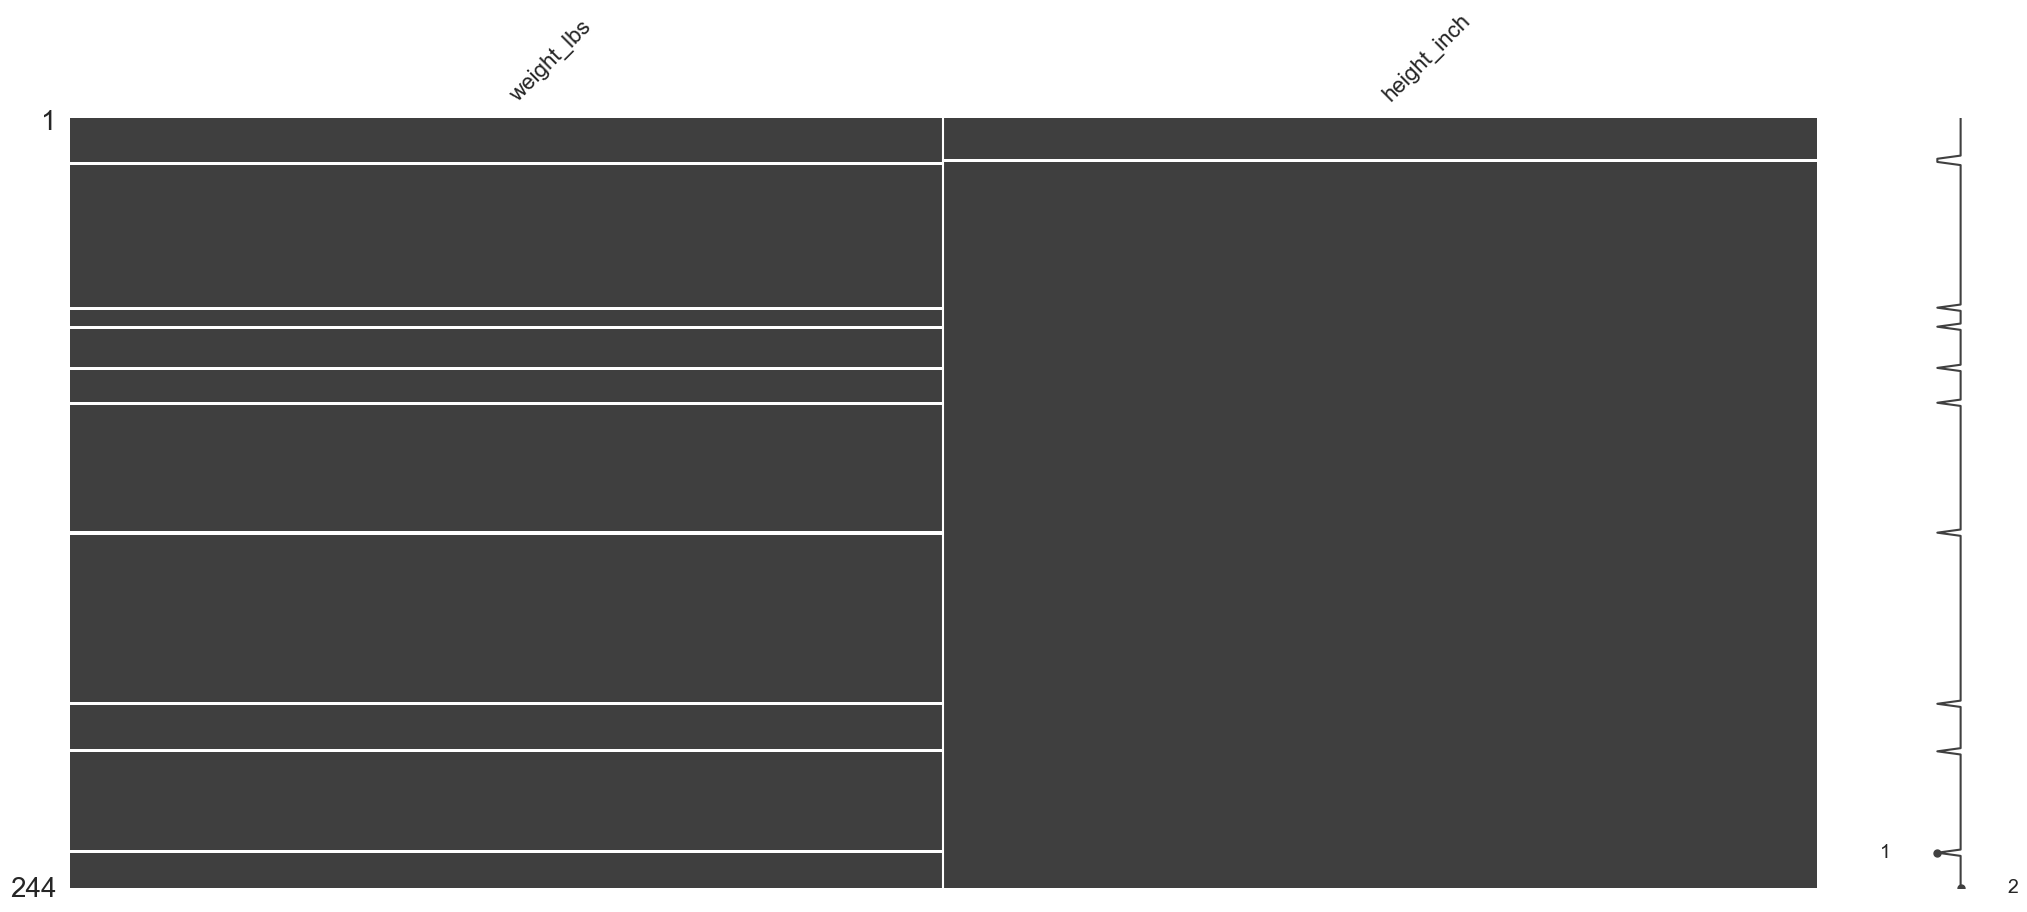

In [86]:
(
    df_rf
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='all'
    )
    .select_columns(['weight_lbs', 'height_inch'])
    .pipe(missingno.matrix)
)

## Imputación a valores faltantes

### Imputación con base en el contexto

In [87]:
df_imp = pd.DataFrame(
    data={
        'name' : ['lynn', np.nan, 'zelda', np.nan, 'shadowsong', np.nan],
        'time' : ['morning', 'afternoon', 'morning','afternoon', 'morning', 'afternoon'],
        'value' : [350, 310, 320, 350, 310,320]
    }
)

df_imp

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [88]:
df_imp.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


### Imputación de un único valor

In [89]:
(
    df_rf
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis = 'rows',
        func = lambda column : column.fillna(column.mean()) if '_NA' not in column.name else column
    )
)

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190.0,64.0,32.68,False,False,False
1,170.0,68.0,25.90,False,False,False
2,163.0,64.0,28.04,False,False,False
3,230.0,74.0,29.59,False,False,False
4,135.0,62.0,24.74,False,False,False
...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False
241,170.0,74.0,21.87,False,False,False
242,175.0,71.0,24.46,False,False,False
243,138.0,64.0,23.74,False,False,False


c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


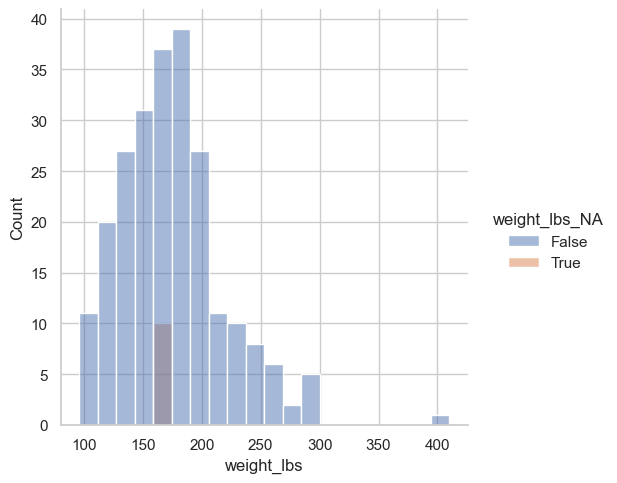

In [90]:
(
    df_rf
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis = 'rows',
        func = lambda column : column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pipe(
        lambda df : (
            sns.displot(
                data=df,
                x='weight_lbs',
                hue='weight_lbs_NA'
            )
        )
    )
)

In [91]:
(
    df_rf
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis = 'rows',
        func = lambda column : column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .assign(
        imputed = lambda df : df['weight_lbs_NA'] | df['height_inch_NA']
    )
)

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA,imputed
0,190.0,64.0,32.68,False,False,False,False
1,170.0,68.0,25.90,False,False,False,False
2,163.0,64.0,28.04,False,False,False,False
3,230.0,74.0,29.59,False,False,False,False
4,135.0,62.0,24.74,False,False,False,False
...,...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False,False
241,170.0,74.0,21.87,False,False,False,False
242,175.0,71.0,24.46,False,False,False,False
243,138.0,64.0,23.74,False,False,False,False


<Axes: xlabel='weight_lbs', ylabel='height_inch'>

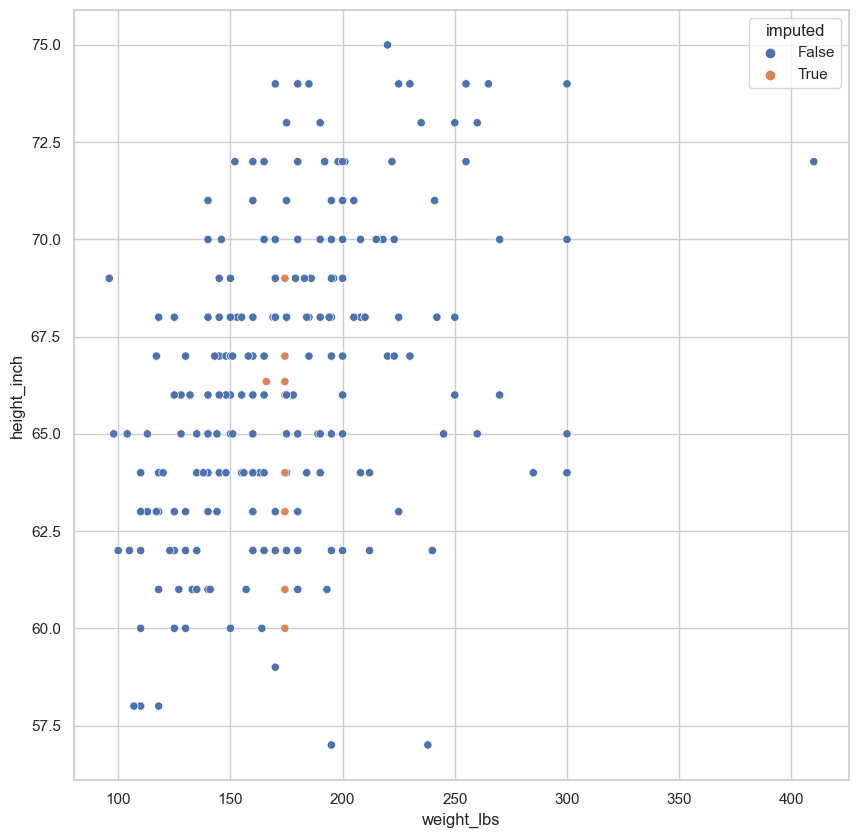

In [92]:
(
    df_rf
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis = 'rows',
        func = lambda column : column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .assign(
        imputed = lambda df : df['weight_lbs_NA'] | df['height_inch_NA']
    )
    .pipe(
        lambda df : (
            sns.scatterplot(
                data=df,
                x='weight_lbs',
                y='height_inch',
                hue='imputed'
            )
        )
    )
)

c:\Users\usuario\Desktop\DS\14-datos-faltantes-detecccion-y-exploracion\project\.env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


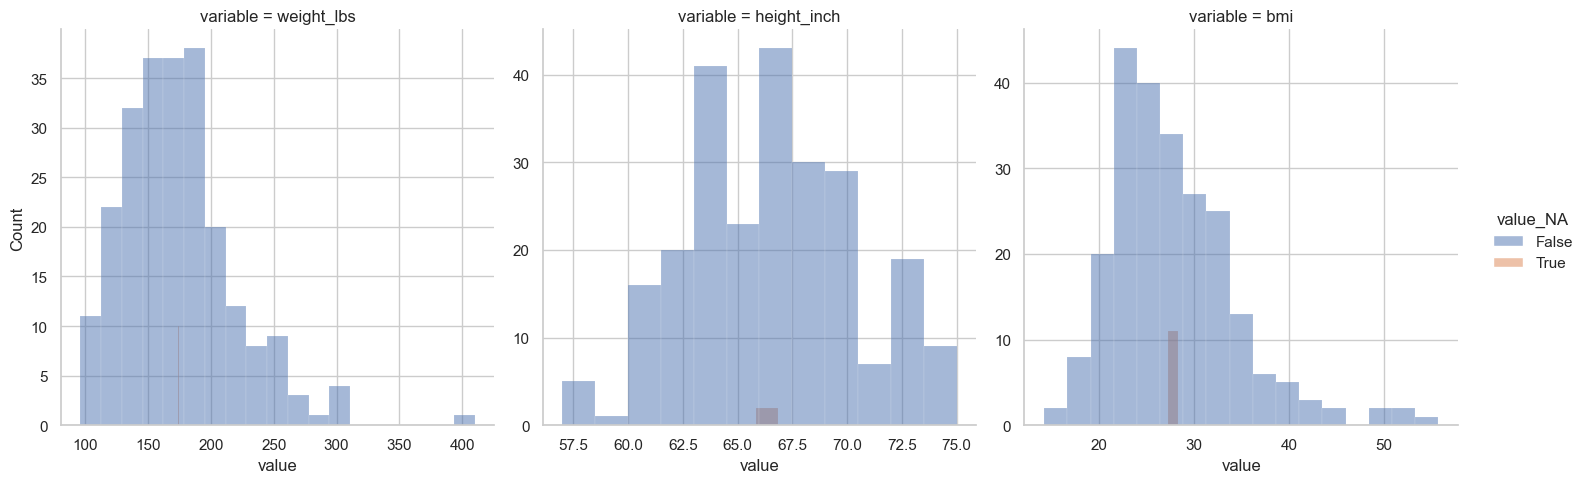

In [93]:
(
    df_rf
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis = 'rows',
        func = lambda column : column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pivot_longer(
        index='*_NA'
    )
    .pivot_longer(
        index=['variable', 'value'],
        names_to = 'variable_NA',
        values_to = 'value_NA'
    )
    .assign(
        valid= lambda df: df.apply(axis='columns', func=lambda column : column.variable in column.variable_NA)
    )
    .query('valid')
    .pipe(
        lambda df : (
            sns.displot(
                data=df,
                x='value',
                hue='value_NA',
                col='variable',
                common_bins=False,
                facet_kws={
                    'sharex' : False,
                    'sharey' : False
                }
            )
        )
    )
)

In [94]:
2 + np.nan

nan